<a href="https://colab.research.google.com/github/jpantojaj/DIP-CS_AI/blob/main/Credit_Scoring_Development_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Desarrollo de un Modelo de Credit Scoring**

## **1. Carga Inicial de Librerías**

In [1]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

## **2. Entendimiento y Analisis Exploratorio de datos**

In [2]:
df_clase = pd.read_csv('Base_SolicitudesCreditoEfectivo_201307_201505.csv', sep = ";")
df_clase.head()

,CODMES,CODSOLICITUD,DEUDA,PLAZO_CREDITO,FLG_GARANTIA,MIN_MES_DE_DEFAULT,FLG_DEFAULT_12M,SEGMENTOCLIENTE,TARJETA_RELACIONADA,VEHICULAR_RELACIONADA,...,INGRESO_CLIENTE,PROFESION,ZONA_DEL_DESEMBOLSO,ESTADO_CIVIL,EDAD_T,CUOTA,LINEA_DE_TC,MONTO_TC_MEMBRESIA,FLG_TC_VISA,FLG_TC_MC
0,201402,1,7116.681318,48,0,NaN,0,CLIENTES ORO,1,0,...,2526.246600,INGENIERO,UCAYALI,SOL,26.0,236.983971,5600.0,170.0,0.0,0.0
1,201404,2,1616.555000,60,0,NaN,0,CLIENTES ORO,1,0,...,2895.761372,TECNICO,AREQUIPA,CAS,49.0,62.089650,19250.0,170.0,0.0,0.0
2,201403,3,8082.775000,48,0,NaN,0,CLIENTES ORO,1,0,...,1474.419056,INGENIERO DE MINAS,PUNO,SOL,33.0,22.894893,10900.0,80.0,0.0,0.0
3,201307,4,10186.990760,48,0,201403.0,1,CLIENTES ORO,0,0,...,1992.756892,TECNICO,CUZCO,SOL,25.0,244.267800,10900.0,80.0,0.0,0.0
4,201401,5,10777.033330,48,0,NaN,0,CLIENTES PLATINUM SEGM 2,1,0,...,1680.938223,TEC MECANICO AUTOMOTRIZ,LIMA_ESTE,CAS,57.0,17.430000,16300.0,170.0,0.0,0.0


In [3]:
df_clase.shape

(31944, 31)

In [4]:
df_clase.columns

Index(['CODMES', 'CODSOLICITUD', 'DEUDA', 'PLAZO_CREDITO', 'FLG_GARANTIA',
       'MIN_MES_DE_DEFAULT', 'FLG_DEFAULT_12M', 'SEGMENTOCLIENTE',
       'TARJETA_RELACIONADA', 'VEHICULAR_RELACIONADA',
       'HIPOTECARIO_RELACIONADA', 'ATRASO_MAXIMO_ULT_6M',
       'ATRASO_MAXIMO_ULT_12M', 'ATRASO_MAXIMO_ULT_24M',
       'MESES_AHORROS_ULT_6M', 'MEDIANA_AHORROS_ULT_6M', 'DEUDA_TOTAL_SISTEMA',
       'CLASIF_SISTEMA_ULT_12M', 'FLG_PDH', 'NUMERO_DE_PAGOS_PDH',
       'MONTO_TC_SISTEMA', 'INGRESO_CLIENTE', 'PROFESION',
       'ZONA_DEL_DESEMBOLSO', 'ESTADO_CIVIL', 'EDAD_T', 'CUOTA', 'LINEA_DE_TC',
       'MONTO_TC_MEMBRESIA', 'FLG_TC_VISA', 'FLG_TC_MC'],
      dtype='object')

In [5]:
df_clase.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31944 entries, 0 to 31943
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CODMES                   31944 non-null  int64  
 1   CODSOLICITUD             31944 non-null  int64  
 2   DEUDA                    31944 non-null  float64
 3   PLAZO_CREDITO            31944 non-null  int64  
 4   FLG_GARANTIA             31944 non-null  int64  
 5   MIN_MES_DE_DEFAULT       3449 non-null   float64
 6   FLG_DEFAULT_12M          31944 non-null  int64  
 7   SEGMENTOCLIENTE          31944 non-null  object 
 8   TARJETA_RELACIONADA      31944 non-null  int64  
 9   VEHICULAR_RELACIONADA    31944 non-null  int64  
 10  HIPOTECARIO_RELACIONADA  31944 non-null  int64  
 11  ATRASO_MAXIMO_ULT_6M     31944 non-null  int64  
 12  ATRASO_MAXIMO_ULT_12M    31941 non-null  float64
 13  ATRASO_MAXIMO_ULT_24M    31937 non-null  float64
 14  MESES_AHORROS_ULT_6M  

In [6]:
df_clase['CODMES']=df_clase['CODMES'].astype(str)
df_clase['CODSOLICITUD']=df_clase['CODSOLICITUD'].astype(str)
df_clase['MIN_MES_DE_DEFAULT']=df_clase['MIN_MES_DE_DEFAULT'].astype(str)
df_clase['FLG_GARANTIA']=df_clase['FLG_GARANTIA'].astype(str)
df_clase['TARJETA_RELACIONADA']=df_clase['TARJETA_RELACIONADA'].astype(str)
df_clase['VEHICULAR_RELACIONADA']=df_clase['VEHICULAR_RELACIONADA'].astype(str)
df_clase['HIPOTECARIO_RELACIONADA']=df_clase['HIPOTECARIO_RELACIONADA'].astype(str)
df_clase['CLASIF_SISTEMA_ULT_12M']=df_clase['CLASIF_SISTEMA_ULT_12M'].astype(str)
df_clase['FLG_PDH']=df_clase['FLG_PDH'].astype(str)
df_clase['FLG_TC_VISA']=df_clase['FLG_TC_VISA'].astype(str)
df_clase['FLG_TC_MC']=df_clase['FLG_TC_MC'].astype(str)

In [7]:
df_clase.head()

,CODMES,CODSOLICITUD,DEUDA,PLAZO_CREDITO,FLG_GARANTIA,MIN_MES_DE_DEFAULT,FLG_DEFAULT_12M,SEGMENTOCLIENTE,TARJETA_RELACIONADA,VEHICULAR_RELACIONADA,...,INGRESO_CLIENTE,PROFESION,ZONA_DEL_DESEMBOLSO,ESTADO_CIVIL,EDAD_T,CUOTA,LINEA_DE_TC,MONTO_TC_MEMBRESIA,FLG_TC_VISA,FLG_TC_MC
0,201402,1,7116.681318,48,0,nan,0,CLIENTES ORO,1,0,...,2526.246600,INGENIERO,UCAYALI,SOL,26.0,236.983971,5600.0,170.0,0.0,0.0
1,201404,2,1616.555000,60,0,nan,0,CLIENTES ORO,1,0,...,2895.761372,TECNICO,AREQUIPA,CAS,49.0,62.089650,19250.0,170.0,0.0,0.0
2,201403,3,8082.775000,48,0,nan,0,CLIENTES ORO,1,0,...,1474.419056,INGENIERO DE MINAS,PUNO,SOL,33.0,22.894893,10900.0,80.0,0.0,0.0
3,201307,4,10186.990760,48,0,201403.0,1,CLIENTES ORO,0,0,...,1992.756892,TECNICO,CUZCO,SOL,25.0,244.267800,10900.0,80.0,0.0,0.0
4,201401,5,10777.033330,48,0,nan,0,CLIENTES PLATINUM SEGM 2,1,0,...,1680.938223,TEC MECANICO AUTOMOTRIZ,LIMA_ESTE,CAS,57.0,17.430000,16300.0,170.0,0.0,0.0


In [8]:
df_clase=df_clase.drop_duplicates()
df_clase.reset_index()
df_clase.shape

(31944, 31)

In [9]:
df_clase.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31944 entries, 0 to 31943
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CODMES                   31944 non-null  object 
 1   CODSOLICITUD             31944 non-null  object 
 2   DEUDA                    31944 non-null  float64
 3   PLAZO_CREDITO            31944 non-null  int64  
 4   FLG_GARANTIA             31944 non-null  object 
 5   MIN_MES_DE_DEFAULT       31944 non-null  object 
 6   FLG_DEFAULT_12M          31944 non-null  int64  
 7   SEGMENTOCLIENTE          31944 non-null  object 
 8   TARJETA_RELACIONADA      31944 non-null  object 
 9   VEHICULAR_RELACIONADA    31944 non-null  object 
 10  HIPOTECARIO_RELACIONADA  31944 non-null  object 
 11  ATRASO_MAXIMO_ULT_6M     31944 non-null  int64  
 12  ATRASO_MAXIMO_ULT_12M    31941 non-null  float64
 13  ATRASO_MAXIMO_ULT_24M    31937 non-null  float64
 14  MESES_AHORROS_ULT_6M  

#### **Tasa de Default o Malos**

In [10]:
target_count = df_clase['FLG_DEFAULT_12M'].value_counts()
target_count

,count
FLG_DEFAULT_12M,
0,29920
1,2024


# Buen_Pagador: 29920
# 1 Mora_12M: 2024
Bad rate: 0.06336088154269973


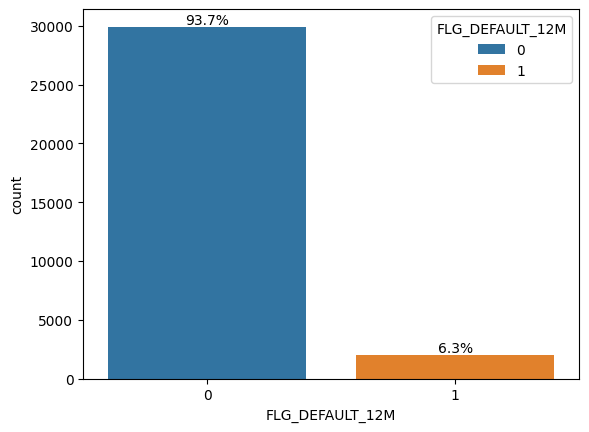

In [11]:
ax = sns.countplot(data = df_clase, x = "FLG_DEFAULT_12M", hue="FLG_DEFAULT_12M")
target_count = df_clase.FLG_DEFAULT_12M.value_counts()
print('# Buen_Pagador:', target_count[0])
print('# 1 Mora_12M:', target_count[1])
print('Bad rate:', target_count[1]/(target_count[0]+target_count[1]))

total = len(df_clase)
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        percentage = '{:.1f}%'.format(100 * height/total)
        x = p.get_x() + p.get_width() / 2
        y = height
        ax.annotate(percentage, (x, y), ha='center', va='bottom')

plt.show()

#### **Analicemos volumetria y tasa de malos/default**

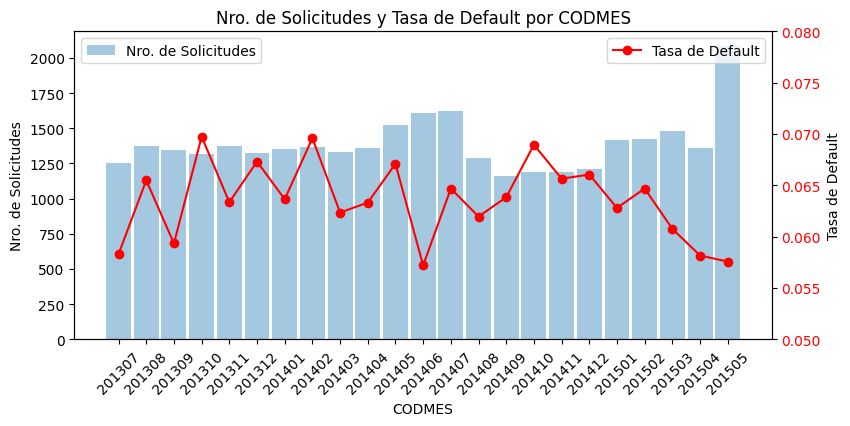

In [12]:
fig, ax1 = plt.subplots(figsize=(9, 4))

a1=df_clase.pivot_table(values="CODSOLICITUD", index="CODMES", aggfunc="count", sort=True)
a2=df_clase.pivot_table(values="FLG_DEFAULT_12M", index="CODMES", aggfunc="mean", sort=True)

ax1.bar(a1.index, a1['CODSOLICITUD'], alpha=0.4, width=0.9, label='Nro. de Solicitudes')
ax1.set_xlabel('CODMES')
ax1.set_ylabel('Nro. de Solicitudes')
ax1.tick_params(axis='x', rotation=45)
ax1.legend(loc='upper left')

ax2 = ax1.twinx()

ax2.plot(a2.index, a2['FLG_DEFAULT_12M'], color='red', marker='o', label='Tasa de Default')
ax2.set_ylabel('Tasa de Default')
ax2.tick_params(axis='y', labelcolor='red')
ax2.legend(loc='upper right')
ax2.set_ylim(0.05, 0.08)

plt.title('Nro. de Solicitudes y Tasa de Default por CODMES')
plt.show()

#### **Hagamos el Análisis Univariado**

##### **Revisemos sus estadísticos básicos**

In [13]:
df_clase.select_dtypes(include=['number']).describe().transpose()

,count,mean,std,min,25%,50%,75%,max
DEUDA,31944.0,5769.284906,5848.504517,8.791365,1602.717111,3768.298333,7786.406583,2.054835e+05
PLAZO_CREDITO,31944.0,39.996588,15.623734,6.000000,24.000000,48.000000,48.000000,6.000000e+01
FLG_DEFAULT_12M,31944.0,0.063361,0.243615,0.000000,0.000000,0.000000,0.000000,1.000000e+00
ATRASO_MAXIMO_ULT_6M,31944.0,0.254070,3.028339,0.000000,0.000000,0.000000,0.000000,2.310000e+02
ATRASO_MAXIMO_ULT_12M,31941.0,1.074168,38.857057,0.000000,0.000000,0.000000,0.000000,5.647000e+03
ATRASO_MAXIMO_ULT_24M,31937.0,2.107931,47.275929,0.000000,0.000000,0.000000,0.000000,5.647000e+03
MESES_AHORROS_ULT_6M,31266.0,5.157935,1.449751,1.000000,5.000000,6.000000,6.000000,6.000000e+00
MEDIANA_AHORROS_ULT_6M,31942.0,7161.642671,8621.384272,0.000000,1703.222083,4325.187267,9396.200433,8.185772e+05
DEUDA_TOTAL_SISTEMA,28763.0,24409.216018,58799.081039,0.000000,1505.645000,6745.890000,20973.860000,1.458561e+06
NUMERO_DE_PAGOS_PDH,31944.0,16.291948,9.419303,0.000000,7.000000,24.000000,24.000000,2.400000e+01


In [14]:
df_clase.select_dtypes(include=['object']).describe().transpose()

,count,unique,top,freq
CODMES,31944,23,201505,2084
CODSOLICITUD,31944,31944,31944,1
FLG_GARANTIA,31944,2,0,30605
MIN_MES_DE_DEFAULT,31944,37,nan,28495
SEGMENTOCLIENTE,31944,7,CLIENTES ORO,22101
TARJETA_RELACIONADA,31944,2,1,19914
VEHICULAR_RELACIONADA,31944,2,0,31612
HIPOTECARIO_RELACIONADA,31944,2,0,31212
CLASIF_SISTEMA_ULT_12M,31944,6,0.0,23640
FLG_PDH,31944,2,1,26825


##### **Revisemos las variable numéricas**

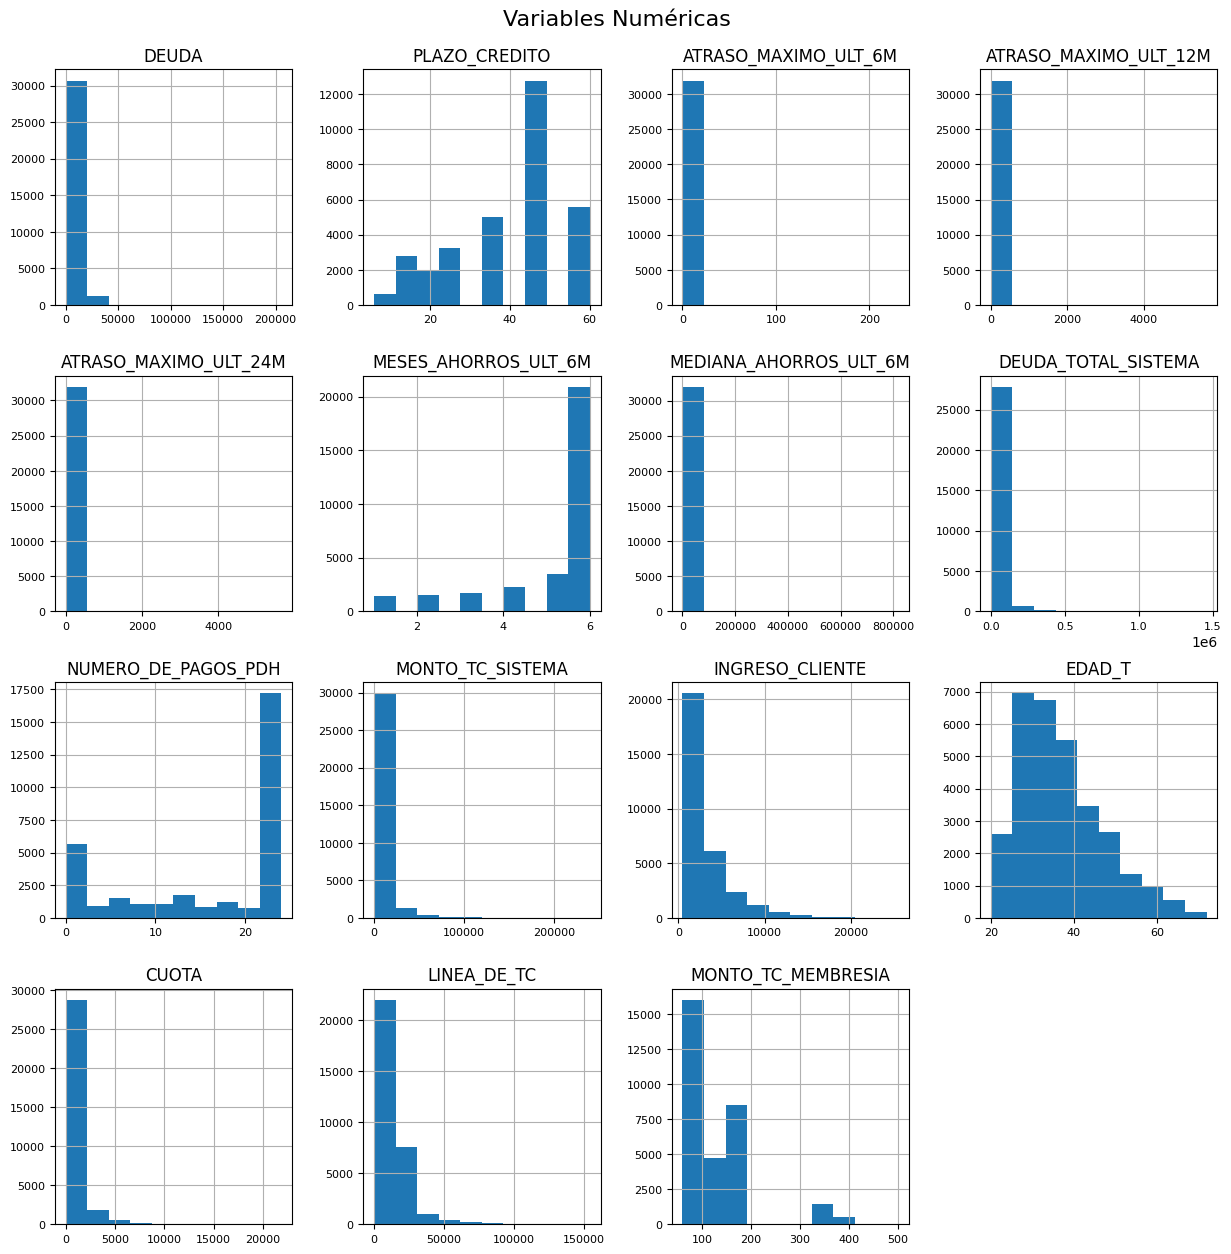

In [15]:
df_clase.drop(columns = ['FLG_DEFAULT_12M']).hist(figsize = (15, 15), xlabelsize=8, ylabelsize=8)
plt.suptitle('Variables Numéricas', y=0.92, fontsize=16)
plt.show()

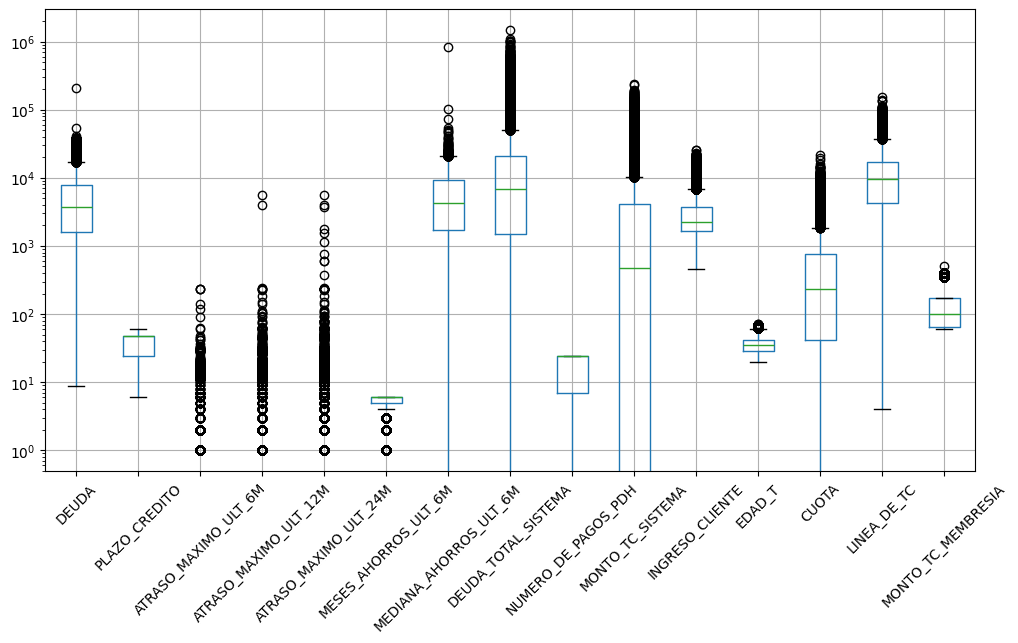

In [16]:
df_clase.drop(columns = ['FLG_DEFAULT_12M']).boxplot(figsize = (12, 6))
plt.yscale('log')
plt.xticks(rotation = 45)
plt.show()

##### **Revisemos las variables categóricas**

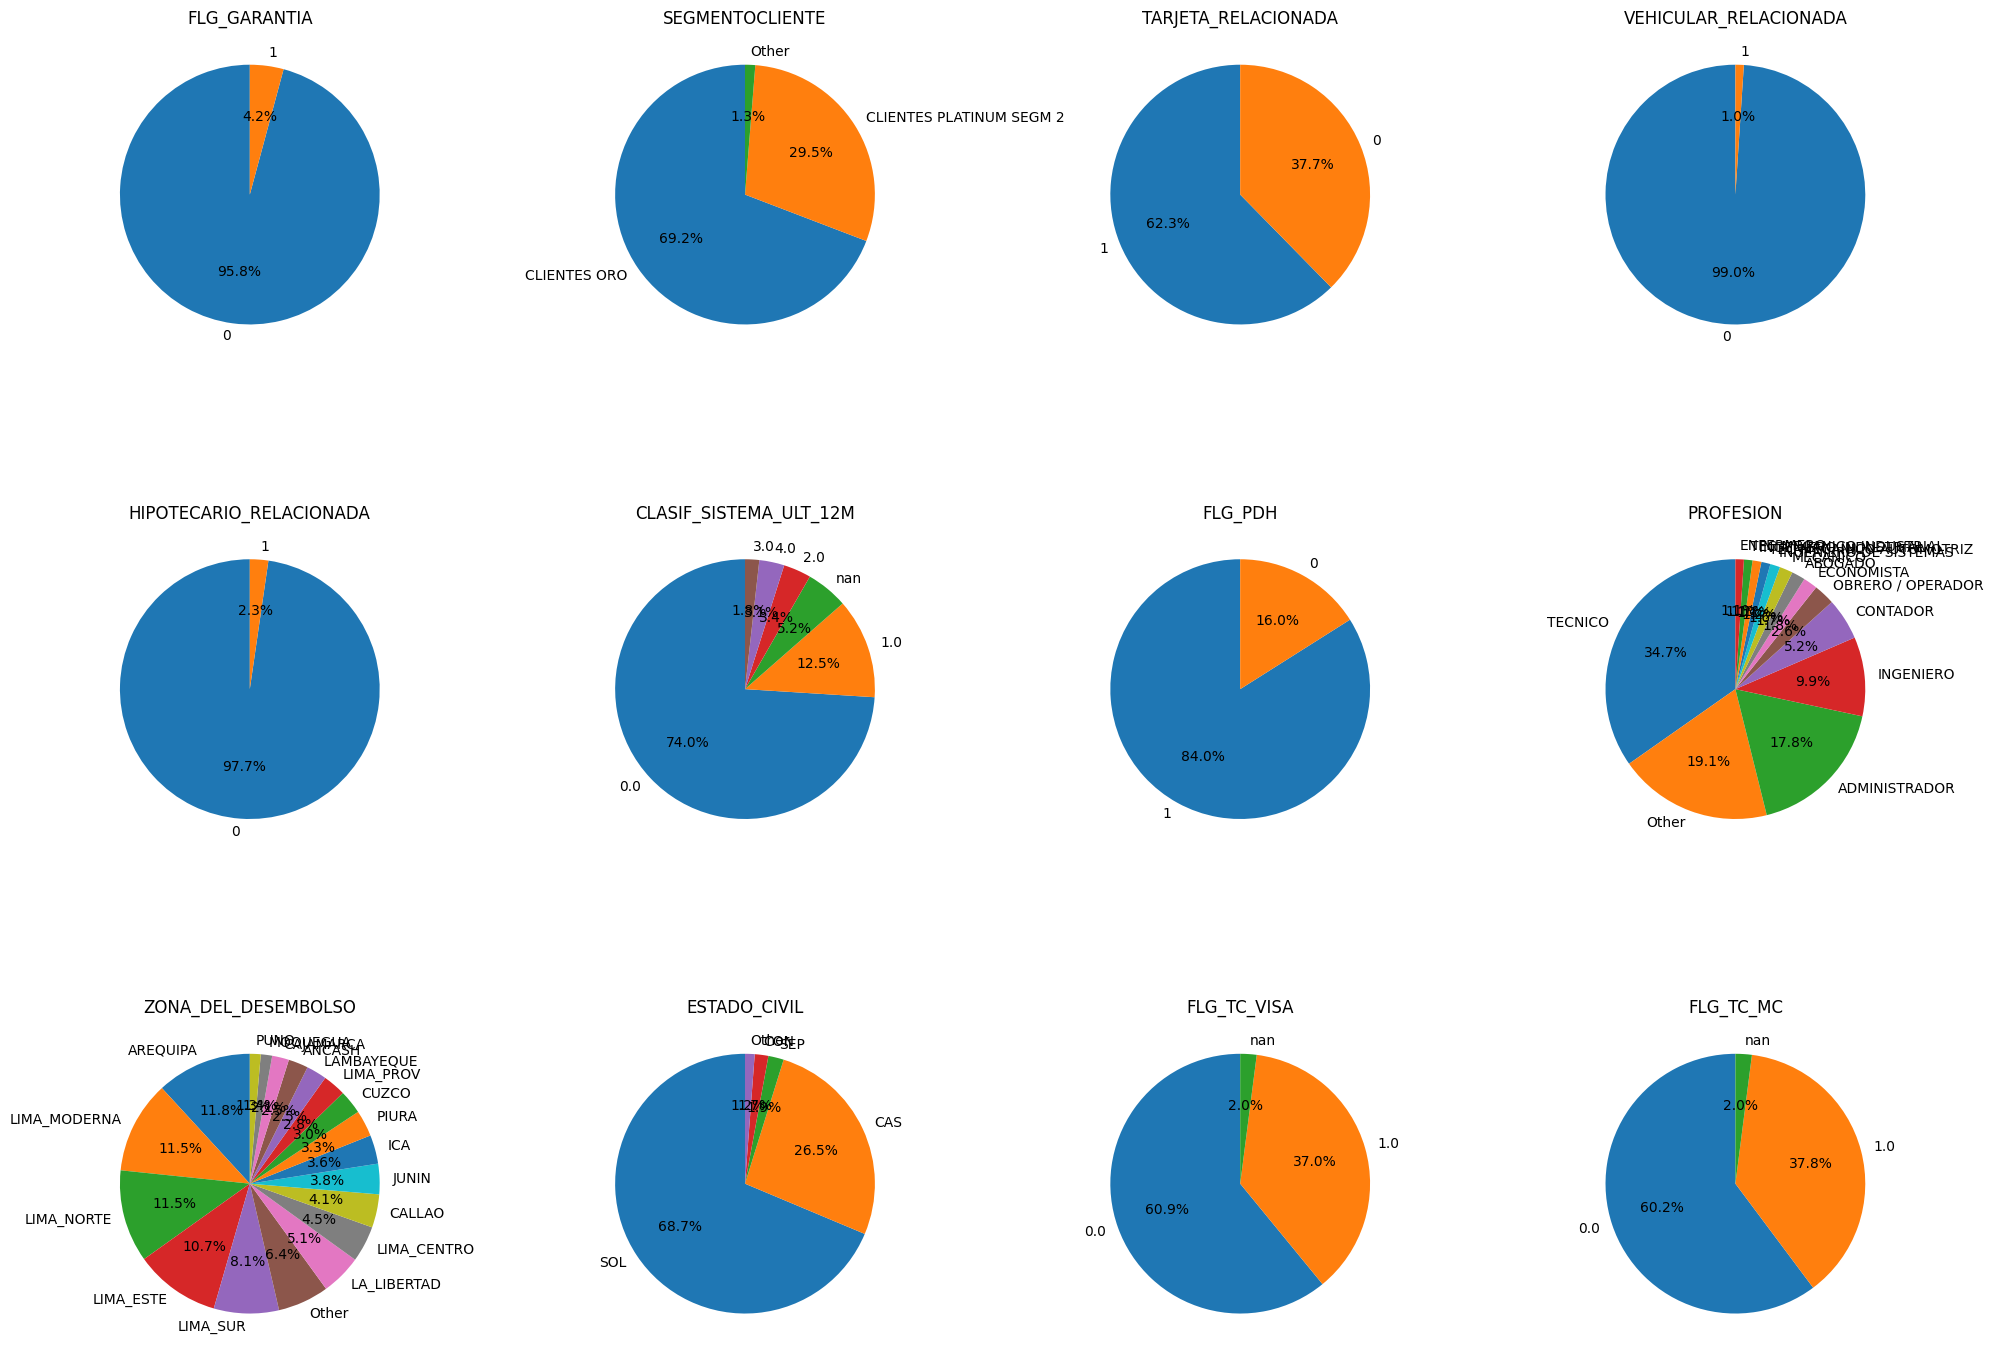

In [17]:
cat_cols = df_clase.select_dtypes(include='object').columns.tolist()
cat_cols_to_plot = [col for col in cat_cols if col not in ['CODSOLICITUD', 'CODMES', 'MIN_MES_DE_DEFAULT']]

n_cols = 4
n_rows = (len(cat_cols_to_plot) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 5))
axes = axes.flatten()

for i, col in enumerate(cat_cols_to_plot):
    ax = axes[i]

    value_counts = df_clase[col].value_counts(normalize=True)
    less_than_1_percent = value_counts[value_counts < 0.01].index
    df_plot = df_clase[col].replace(less_than_1_percent, 'Other').value_counts()

    df_plot.plot.pie(ax=ax, autopct='%1.1f%%', startangle=90)
    ax.set_title(f'{col}')
    ax.set_ylabel('')

for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

##### **Revisemos la cantidad de nulos y sus proporciones por variable**

In [18]:
null_values = pd.concat([df_clase.isnull().sum(), df_clase.isnull().sum() / len(df_clase)], axis = 1)
null_values.rename(columns = {0: 'number_null_values',1: 'ratio_null_values'}, inplace = True)
null_values[null_values['ratio_null_values'] > 0]

,number_null_values,ratio_null_values
ATRASO_MAXIMO_ULT_12M,3,0.000094
ATRASO_MAXIMO_ULT_24M,7,0.000219
MESES_AHORROS_ULT_6M,678,0.021225
MEDIANA_AHORROS_ULT_6M,2,0.000063
DEUDA_TOTAL_SISTEMA,3181,0.099581
INGRESO_CLIENTE,778,0.024355
PROFESION,340,0.010644
ZONA_DEL_DESEMBOLSO,990,0.030992
ESTADO_CIVIL,990,0.030992
EDAD_T,990,0.030992


##### Identificar variables con más del 1% de valores perdidos

In [19]:
variables_with_high_missing = null_values[null_values['ratio_null_values'] > 0.01].index.tolist()
print("Variables con más del 1% de valores perdidos:")
print(variables_with_high_missing)

Variables con más del 1% de valores perdidos:
['MESES_AHORROS_ULT_6M', 'DEUDA_TOTAL_SISTEMA', 'INGRESO_CLIENTE', 'PROFESION', 'ZONA_DEL_DESEMBOLSO', 'ESTADO_CIVIL', 'EDAD_T', 'CUOTA', 'LINEA_DE_TC', 'MONTO_TC_MEMBRESIA']


##### Visualizar patrones de valores perdidos

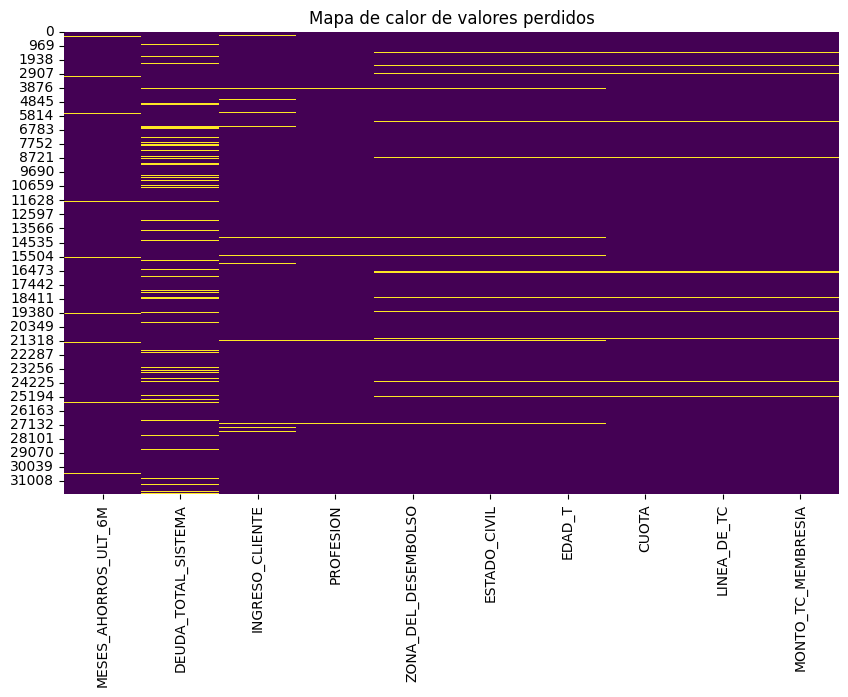

In [20]:
df_high_missing = df_clase[variables_with_high_missing]
plt.figure(figsize=(10, 6))
sns.heatmap(df_high_missing.isnull(), cbar=False, cmap='viridis')
plt.title('Mapa de calor de valores perdidos')
plt.show()

##### Probar si existe aleatoriedad en los valores perdidos o no

In [21]:
from scipy import stats
for missing_var in variables_with_high_missing:
    print(f"\n--- Analyzing missingness in '{missing_var}' ---")

    #Separar en grupos con y sin valores perdidos apra cada variable
    df_missing = df_clase[df_clase[missing_var].isnull()]
    df_not_missing = df_clase[df_clase[missing_var].notnull()]

    print(f"Number of rows with missing '{missing_var}': {len(df_missing)}")
    print(f"Number of rows without missing '{missing_var}': {len(df_not_missing)}")

    # Analizar las otras variables respecto a el missing o no
    print("\nComparing distributions of other variables:")
    other_vars_to_compare = [col for col in df_clase.columns if col not in variables_with_high_missing + [missing_var, 'CODMES', 'CODSOLICITUD', 'MIN_MES_DE_DEFAULT']]
    numerical_vars_to_compare = df_clase[other_vars_to_compare].select_dtypes(include=np.number).columns.tolist()
    categorical_vars_to_compare = df_clase[other_vars_to_compare].select_dtypes(include='object').columns.tolist()

    # Comparar variables numéricas usando test t
    print("\nComparing numerical variables (t-tests):")
    for other_var in numerical_vars_to_compare:
        if len(df_missing) > 1 and len(df_not_missing) > 1 and df_missing[other_var].nunique() > 1 and df_not_missing[other_var].nunique() > 1:
            try:
                ttest_result = stats.ttest_ind(df_missing[other_var].dropna(), df_not_missing[other_var].dropna())
                print(f"  - {other_var}: p-value = {ttest_result.pvalue:.4f}")
                if ttest_result.pvalue < 0.05:
                    print("    (Distributions are significantly different - suggests not MCAR)")
                else:
                    print("    (Distributions are not significantly different - consistent with MCAR)")
            except Exception as e:
                print(f"  - {other_var}: Could not perform t-test ({e})")
        else:
             print(f"  - {other_var}: Not enough data or variance to perform t-test")

    # Comparar variables categóricas usando test chi cuadrado
    print("\nComparing categorical variables (Chi-squared tests):")
    for other_var in categorical_vars_to_compare:
        if len(df_missing) > 0 and len(df_not_missing) > 0 and df_missing[other_var].nunique() > 1 and df_not_missing[other_var].nunique() > 1:
            try:
                contingency_table = pd.crosstab(df_clase[other_var], df_clase[missing_var].isnull())
                chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)
                print(f"  - {other_var}: p-value = {p_value:.4f}")
                if p_value < 0.05:
                    print("    (Distributions are significantly different - suggests not MCAR)")
                else:
                    print("    (Distributions are not significantly different - consistent with MCAR)")
            except Exception as e:
                print(f"  - {other_var}: Could not perform Chi-squared test ({e})")
        else:
            print(f"  - {other_var}: Not enough data or variance to perform Chi-squared test")


--- Analyzing missingness in 'MESES_AHORROS_ULT_6M' ---
Number of rows with missing 'MESES_AHORROS_ULT_6M': 678
Number of rows without missing 'MESES_AHORROS_ULT_6M': 31266

Comparing distributions of other variables:

Comparing numerical variables (t-tests):
  - DEUDA: p-value = 0.0000
    (Distributions are significantly different - suggests not MCAR)
  - PLAZO_CREDITO: p-value = 0.0000
    (Distributions are significantly different - suggests not MCAR)
  - FLG_DEFAULT_12M: p-value = 0.0000
    (Distributions are significantly different - suggests not MCAR)
  - ATRASO_MAXIMO_ULT_6M: p-value = 0.0227
    (Distributions are significantly different - suggests not MCAR)
  - ATRASO_MAXIMO_ULT_12M: p-value = 0.8270
    (Distributions are not significantly different - consistent with MCAR)
  - ATRASO_MAXIMO_ULT_24M: p-value = 0.8279
    (Distributions are not significantly different - consistent with MCAR)
  - MEDIANA_AHORROS_ULT_6M: p-value = 0.0000
    (Distributions are significantly di

##### **Conclusión sobre la tipología de los datos faltantes:**

##### En general, dado que para la mayoría de las variables con valores faltantes encontramos que las distribuciones de otras variables difieren significativamente entre los casos con y sin missing, es poco probable que los datos sean **MCAR (Missing Completely At Random).**
##### Por ende, eliminar las filas con valores faltantes podría introducir sesgos.

#### **Revisemos los valores atípicos**

##### Basado en rangos intercuartílicos

In [22]:
def outliers_col(df):
    outlier_data = []
    for columna in df.select_dtypes(include=np.number).columns: # Only iterate through numerical columns
        q1 = stats.scoreatpercentile(df[columna], 25)
        q3 = stats.scoreatpercentile(df[columna], 75)
        iqr = q3 - q1
        lim_inf = q1 - 1.5 * iqr
        lim_sup = q3 + 1.5 * iqr
        n_outliers_inf = len(df[(df[columna] < lim_inf)])
        n_outliers_sup = len(df[(df[columna] > lim_sup)])
        total_count = len(df[columna])
        pct_outliers_inf = (n_outliers_inf / total_count) * 100
        pct_outliers_sup = (n_outliers_sup / total_count) * 100

        outlier_data.append({
            'Variable': columna,
            'Outliers < Lim Inf': n_outliers_inf,
            'Pct < Lim Inf': f'{pct_outliers_inf:.2f}%',
            'Outliers > Lim Sup': n_outliers_sup,
            'Pct > Lim Sup': f'{pct_outliers_sup:.2f}%'
        })

    outlier_df = pd.DataFrame(outlier_data)
    display(outlier_df) # Use display for better formatting

In [23]:
outliers_col(df_clase)

,Variable,Outliers < Lim Inf,Pct < Lim Inf,Outliers > Lim Sup,Pct > Lim Sup
0,DEUDA,0,0.00%,2126,6.66%
1,PLAZO_CREDITO,0,0.00%,0,0.00%
2,FLG_DEFAULT_12M,0,0.00%,2024,6.34%
3,ATRASO_MAXIMO_ULT_6M,0,0.00%,2005,6.28%
4,ATRASO_MAXIMO_ULT_12M,0,0.00%,4154,13.00%
5,ATRASO_MAXIMO_ULT_24M,0,0.00%,6634,20.77%
6,MESES_AHORROS_ULT_6M,4635,14.51%,0,0.00%
7,MEDIANA_AHORROS_ULT_6M,0,0.00%,3318,10.39%
8,DEUDA_TOTAL_SISTEMA,0,0.00%,1880,5.89%
9,NUMERO_DE_PAGOS_PDH,0,0.00%,0,0.00%


##### Basado en Modelos Isolation Forest (Multivariado)

In [24]:
from sklearn.ensemble import IsolationForest

# Seleccioanr variables numéricas
numerical_cols_for_if = df_clase.select_dtypes(include=np.number).columns.tolist()
df_numerical_if = df_clase[numerical_cols_for_if].dropna()

# Inicializar el modelo Isolation Forest
iso_forest = IsolationForest(random_state=42, contamination='auto')
iso_forest.fit(df_numerical_if)

# Predecir outliers
outlier_labels = iso_forest.predict(df_numerical_if)
anomaly_scores = iso_forest.decision_function(df_numerical_if)

# Conteo de outliers
n_outliers = list(outlier_labels).count(-1)
total_samples = len(df_numerical_if)
pct_outliers = (n_outliers / total_samples) * 100

print(f"--- Outlier Analysis using Isolation Forest ---")
print(f"Total samples analyzed: {total_samples}")
print(f"Number of outliers detected: {n_outliers}")
print(f"Percentage of outliers: {pct_outliers:.2f}%")

--- Outlier Analysis using Isolation Forest ---
Total samples analyzed: 26952
Number of outliers detected: 3325
Percentage of outliers: 12.34%


In [25]:
#plt.figure(figsize=(10, 6))
#sns.histplot(anomaly_scores, bins=50, kde=True)
#plt.title('Distribución de Scores de Anomalías (Isolation Forest)')
#plt.xlabel('Score de Anomalías')
#plt.ylabel('Frecuencia')
#plt.show()

In [26]:
#df_numerical_if['outlier'] = outlier_labels
#display(df_numerical_if.groupby('outlier').describe().T)

##### Comparación entre outliers IQR y Isolation Forest

In [27]:
df_compare_outliers = df_clase.copy()

In [28]:
import re

def add_iqr_outlier_flags_to_df(df_input):
    modified_df = df_input.copy()
    numerical_cols = modified_df.select_dtypes(include=np.number).columns

    for col in numerical_cols:
        Q1 = modified_df[col].quantile(0.25)
        Q3 = modified_df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        modified_df[f'is_outlier_iqr_{col}'] = (
            (modified_df[col] < lower_bound) | (modified_df[col] > upper_bound)
        )
    return modified_df

df_compare_outliers = add_iqr_outlier_flags_to_df(df_compare_outliers)
outlier_iqr_cols_temp = [col for col in df_compare_outliers.columns if re.match(r'is_outlier_iqr_.*', col)]
df_compare_outliers['is_outlier_iqr_any'] = df_compare_outliers[outlier_iqr_cols_temp].any(axis=1)
print("--- IQR Outlier Flagging on Copy Complete ---")
display(df_compare_outliers[['is_outlier_iqr_any'] + outlier_iqr_cols_temp].head())

--- IQR Outlier Flagging on Copy Complete ---


,is_outlier_iqr_any,is_outlier_iqr_DEUDA,is_outlier_iqr_PLAZO_CREDITO,is_outlier_iqr_FLG_DEFAULT_12M,is_outlier_iqr_ATRASO_MAXIMO_ULT_6M,is_outlier_iqr_ATRASO_MAXIMO_ULT_12M,is_outlier_iqr_ATRASO_MAXIMO_ULT_24M,is_outlier_iqr_MESES_AHORROS_ULT_6M,is_outlier_iqr_MEDIANA_AHORROS_ULT_6M,is_outlier_iqr_DEUDA_TOTAL_SISTEMA,is_outlier_iqr_NUMERO_DE_PAGOS_PDH,is_outlier_iqr_MONTO_TC_SISTEMA,is_outlier_iqr_INGRESO_CLIENTE,is_outlier_iqr_EDAD_T,is_outlier_iqr_CUOTA,is_outlier_iqr_LINEA_DE_TC,is_outlier_iqr_MONTO_TC_MEMBRESIA
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [29]:
numerical_cols_for_if_model_temp = df_compare_outliers.select_dtypes(include=np.number).columns.tolist()
numerical_cols_for_if_model_temp = [col for col in numerical_cols_for_if_model_temp if not (col.startswith('is_outlier_iqr_') or col == 'is_outlier_iqr_any')]
df_numerical_for_if_temp = df_compare_outliers[numerical_cols_for_if_model_temp].dropna()
iso_forest_temp = IsolationForest(random_state=42, contamination='auto')
iso_forest_temp.fit(df_numerical_for_if_temp)
anomaly_labels_temp = iso_forest_temp.predict(df_numerical_for_if_temp)
is_outlier_if_temp = pd.Series(False, index=df_compare_outliers.index, name='is_outlier_if')
is_outlier_if_temp.loc[df_numerical_for_if_temp.index] = (anomaly_labels_temp == -1)
df_compare_outliers['is_outlier_if'] = is_outlier_if_temp

print("\n--- Isolation Forest Outlier Flagging on Copy Complete ---")
display(df_compare_outliers[['is_outlier_if']].head())
display(df_compare_outliers['is_outlier_if'].value_counts())


--- Isolation Forest Outlier Flagging on Copy Complete ---


,is_outlier_if
0,False
1,False
2,False
3,False
4,False


,count
is_outlier_if,
False,28619
True,3325


In [30]:
print("\n--- Comparación de Outliers (IQR vs. Isolation Forest) ---")
contingency_table = pd.crosstab(df_compare_outliers['is_outlier_iqr_any'], df_compare_outliers['is_outlier_if'], margins=True)
print("\nContingency Table (IQR vs. Isolation Forest Outliers):\n")
display(contingency_table)


--- Comparación de Outliers (IQR vs. Isolation Forest) ---

Contingency Table (IQR vs. Isolation Forest Outliers):



is_outlier_if,False,True,All
is_outlier_iqr_any,,,
False,14374,0,14374
True,14245,3325,17570
All,28619,3325,31944


In [31]:
total_samples = contingency_table.loc['All', 'All']

agreement_both_inlier = contingency_table.loc[False, False]
agreement_both_outlier = 0 # Default to 0 if True, True cell doesn't exist
if True in contingency_table.index and True in contingency_table.columns:
    agreement_both_outlier = contingency_table.loc[True, True]
overall_agreement_pct = ((agreement_both_inlier + agreement_both_outlier) / total_samples) * 100
overlap_outlier_pct = (agreement_both_outlier / total_samples) * 100
iqr_only_outlier_pct = 0 # Default to 0
if True in contingency_table.index and False in contingency_table.columns:
    iqr_only_outlier_pct = (contingency_table.loc[True, False] / total_samples) * 100

if_only_outlier_pct = 0 # Default to 0
if False in contingency_table.index and True in contingency_table.columns:
    if_only_outlier_pct = (contingency_table.loc[False, True] / total_samples) * 100

print(f"\nPorcentaje de Coincidencia Global: {overall_agreement_pct:.2f}%")
print(f"Porcentaje donde ambos coinciden: {overlap_outlier_pct:.2f}%")
print(f"Porcentaje Oultiers solo por IQR: {iqr_only_outlier_pct:.2f}%")
print(f"Porcentaje Ouliers solo por IF: {if_only_outlier_pct:.2f}%")


Porcentaje de Coincidencia Global: 55.41%
Porcentaje donde ambos coinciden: 10.41%
Porcentaje Oultiers solo por IQR: 44.59%
Porcentaje Ouliers solo por IF: 0.00%


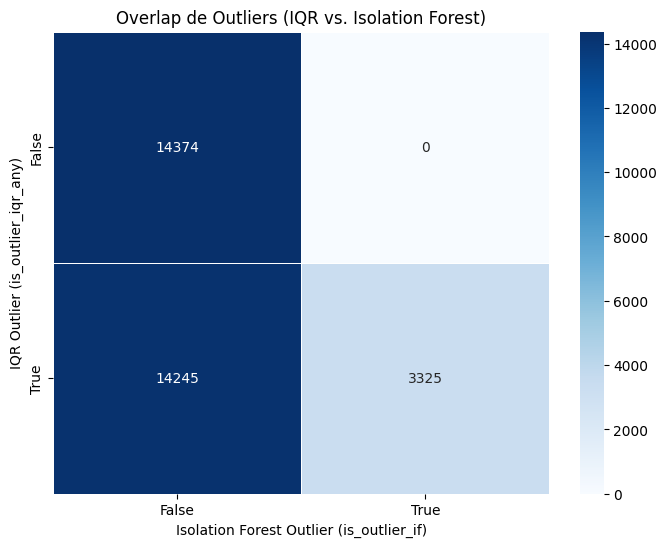

In [32]:
plt.figure(figsize=(8, 6))
plot_table_values = pd.DataFrame(0, index=[False, True], columns=[False, True])
for idx in [False, True]:
    for col_val in [False, True]:
        if idx in contingency_table.index and col_val in contingency_table.columns:
            plot_table_values.loc[idx, col_val] = contingency_table.loc[idx, col_val]

sns.heatmap(plot_table_values, annot=True, fmt='d', cmap='Blues', linewidths=.5)
plt.title('Overlap de Outliers (IQR vs. Isolation Forest)')
plt.xlabel('Isolation Forest Outlier (is_outlier_if)')
plt.ylabel('IQR Outlier (is_outlier_iqr_any)')
plt.show()

#### **Revisemos las correlaciones / asociaciones**

,DEUDA,PLAZO_CREDITO,ATRASO_MAXIMO_ULT_6M,ATRASO_MAXIMO_ULT_12M,ATRASO_MAXIMO_ULT_24M,MESES_AHORROS_ULT_6M,MEDIANA_AHORROS_ULT_6M,DEUDA_TOTAL_SISTEMA,NUMERO_DE_PAGOS_PDH,MONTO_TC_SISTEMA,INGRESO_CLIENTE,EDAD_T,CUOTA,LINEA_DE_TC,MONTO_TC_MEMBRESIA
DEUDA,1.000000,0.563483,0.011512,-0.003455,-0.003098,0.133302,0.284829,0.347254,-0.109651,0.388112,0.452504,0.147920,0.473427,0.266316,0.326340
PLAZO_CREDITO,0.563483,1.000000,0.022457,-0.003804,0.000413,0.048946,0.149256,0.225000,-0.034037,0.239272,0.244348,0.045946,0.321024,0.124693,0.151804
ATRASO_MAXIMO_ULT_6M,0.011512,0.022457,1.000000,0.083028,0.078199,-0.040203,-0.004495,0.030198,-0.017221,0.014766,0.004088,0.010250,0.027450,-0.011218,0.001030
ATRASO_MAXIMO_ULT_12M,-0.003455,-0.003804,0.083028,1.000000,0.822126,-0.023398,-0.001436,0.000114,-0.002735,-0.002195,-0.006061,-0.001312,-0.000237,-0.004734,-0.002998
ATRASO_MAXIMO_ULT_24M,-0.003098,0.000413,0.078199,0.822126,1.000000,-0.024684,-0.007211,-0.002469,-0.009444,-0.003688,-0.010092,0.006465,-0.001355,-0.008129,-0.008661
MESES_AHORROS_ULT_6M,0.133302,0.048946,-0.040203,-0.023398,-0.024684,1.000000,0.227005,0.074298,0.072479,0.045134,0.284736,-0.011234,0.085142,0.151250,0.141160
MEDIANA_AHORROS_ULT_6M,0.284829,0.149256,-0.004495,-0.001436,-0.007211,0.227005,1.000000,0.205670,0.104674,0.126633,0.545248,0.191158,0.210583,0.272078,0.262680
DEUDA_TOTAL_SISTEMA,0.347254,0.225000,0.030198,0.000114,-0.002469,0.074298,0.205670,1.000000,-0.042258,0.475576,0.558708,0.129350,0.804898,0.315826,0.344950
NUMERO_DE_PAGOS_PDH,-0.109651,-0.034037,-0.017221,-0.002735,-0.009444,0.072479,0.104674,-0.042258,1.000000,-0.071905,0.033523,0.012417,-0.059385,-0.004688,-0.053763
MONTO_TC_SISTEMA,0.388112,0.239272,0.014766,-0.002195,-0.003688,0.045134,0.126633,0.475576,-0.071905,1.000000,0.447074,0.161073,0.711507,0.425144,0.345717


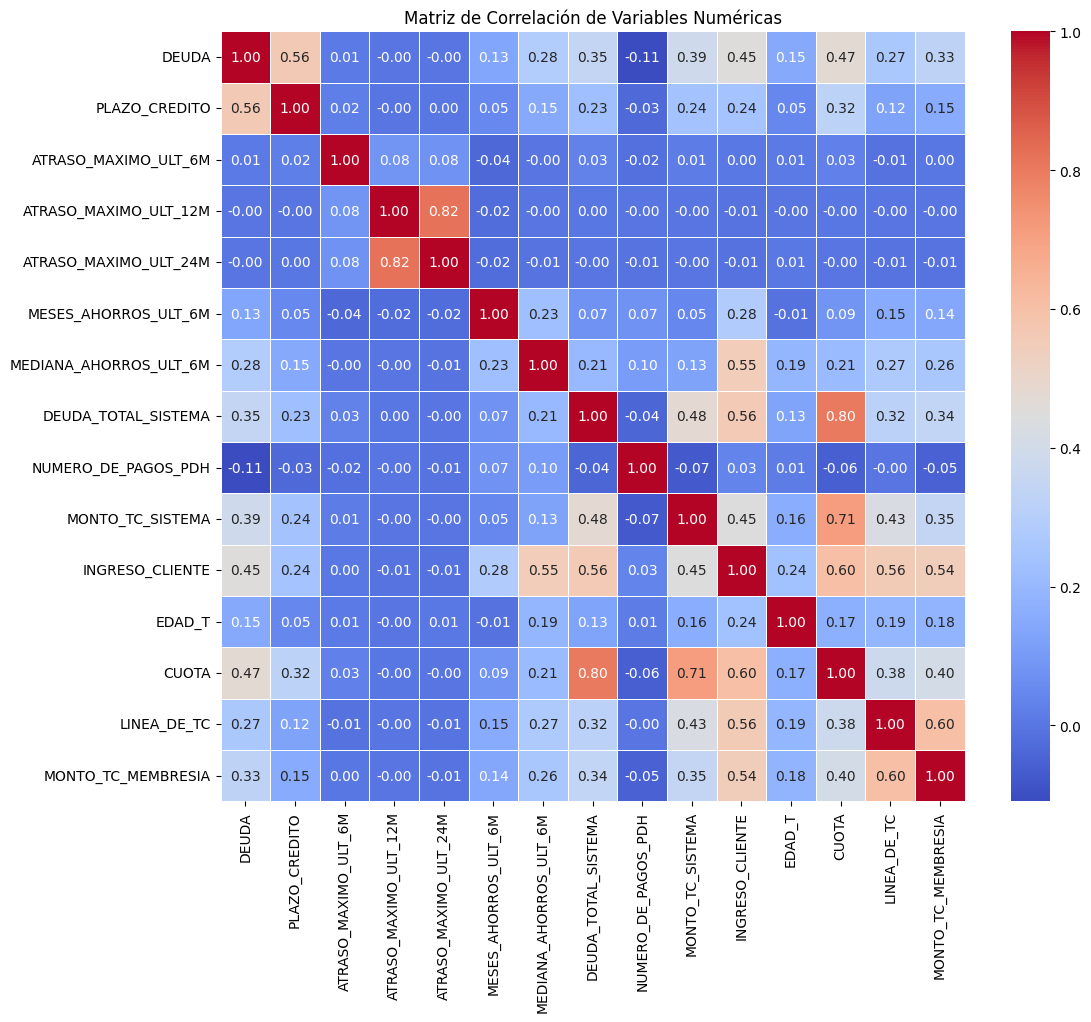

In [33]:
df_numerical = df_clase.select_dtypes(include=np.number).drop(columns = ['FLG_DEFAULT_12M'])
correlation_matrix = df_numerical.corr()
display(correlation_matrix)
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlación de Variables Numéricas')
plt.show()

In [34]:
import scipy.stats as stats

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

,FLG_GARANTIA,SEGMENTOCLIENTE,TARJETA_RELACIONADA,VEHICULAR_RELACIONADA,HIPOTECARIO_RELACIONADA,CLASIF_SISTEMA_ULT_12M,FLG_PDH,PROFESION,ZONA_DEL_DESEMBOLSO,ESTADO_CIVIL,FLG_TC_VISA,FLG_TC_MC
FLG_GARANTIA,1.0,0.260842,0.054121,0.444479,0.613645,0.053931,0.057612,0.280583,0.172486,0.132809,0.056902,0.059413
SEGMENTOCLIENTE,0.260842,1.0,0.118394,0.118984,0.205859,0.05158,0.146931,0.149028,0.113278,0.096301,0.082162,0.085176
TARJETA_RELACIONADA,0.054121,0.118394,1.0,0.030407,0.034598,0.219446,0.064448,0.132365,0.122434,0.057724,0.986192,0.971012
VEHICULAR_RELACIONADA,0.444479,0.118984,0.030407,1.0,0.065553,0.028395,0.01252,0.270059,0.099357,0.034425,0.031455,0.032846
HIPOTECARIO_RELACIONADA,0.613645,0.205859,0.034598,0.065553,1.0,0.042198,0.034451,0.173874,0.126447,0.123,0.036818,0.038915
CLASIF_SISTEMA_ULT_12M,0.053931,0.05158,0.219446,0.028395,0.042198,1.0,0.041214,0.063383,0.046001,0.02759,0.153317,0.149788
FLG_PDH,0.057612,0.146931,0.064448,0.01252,0.034451,0.041214,1.0,0.153746,0.110013,0.043326,0.062718,0.06559
PROFESION,0.280583,0.149028,0.132365,0.270059,0.173874,0.063383,0.153746,1.0,0.112668,0.093342,0.71091,0.711174
ZONA_DEL_DESEMBOLSO,0.172486,0.113278,0.122434,0.099357,0.126447,0.046001,0.110013,0.112668,1.0,0.075394,0.122548,0.124144
ESTADO_CIVIL,0.132809,0.096301,0.057724,0.034425,0.123,0.02759,0.043326,0.093342,0.075394,1.0,0.057311,0.051523


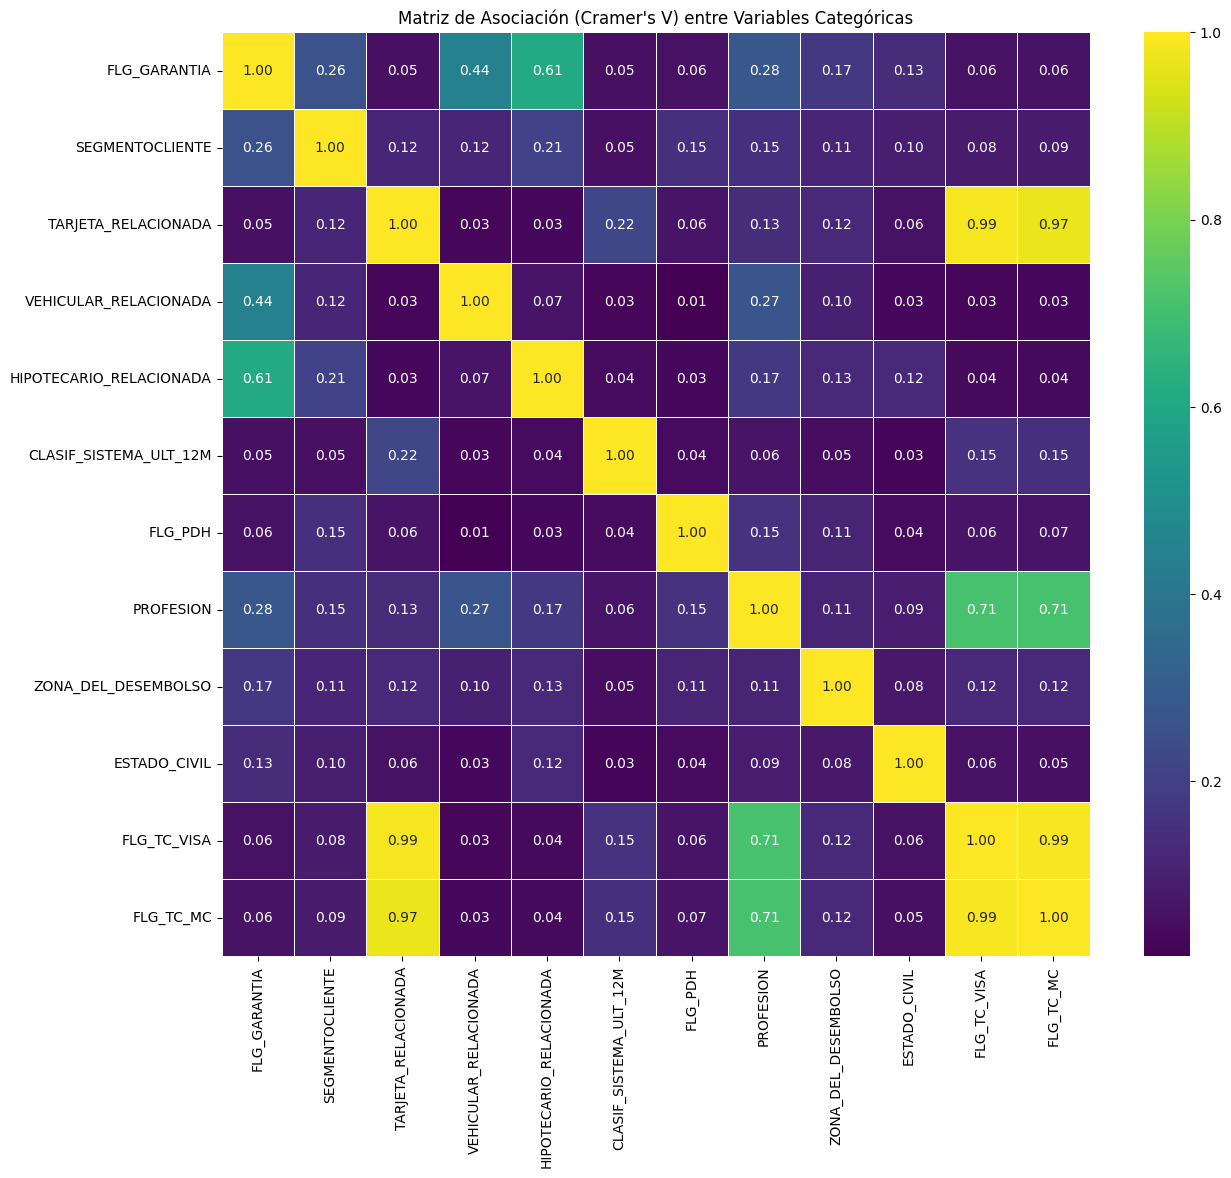

In [35]:
categorical_cols = df_clase.select_dtypes(include='object').columns.tolist()
categorical_cols_filtered = [col for col in categorical_cols if col not in ['CODMES', 'CODSOLICITUD', 'MIN_MES_DE_DEFAULT']]

cramer_matrix = pd.DataFrame(index=categorical_cols_filtered, columns=categorical_cols_filtered)

for col1 in categorical_cols_filtered:
    for col2 in categorical_cols_filtered:
        if col1 == col2:
            cramer_matrix.loc[col1, col2] = 1.0
        else:
            temp_df = df_clase[[col1, col2]].dropna()
            if len(temp_df) > 0:
                try:
                    cramer_matrix.loc[col1, col2] = cramers_v(temp_df[col1], temp_df[col2])
                except ValueError:
                    cramer_matrix.loc[col1, col2] = np.nan # If calculation fails due to insufficient data/variance
            else:
                cramer_matrix.loc[col1, col2] = np.nan

display(cramer_matrix)

plt.figure(figsize=(14, 12))
sns.heatmap(cramer_matrix.astype(float), annot=True, cmap='viridis', fmt=".2f", linewidths=.5)
plt.title('Matriz de Asociación (Cramer\'s V) entre Variables Categóricas')
plt.show()

## **3. Feature Engineering**

#### 3.1 Tratamiento de Missing:
#####Según el caso elegiremos rellenar estos casos con un valor usualmente conocido (dado el tipo de variable que estemos analizando), o imputar con la mediana o el valor más frecuente, según sea numérica o categórica respectivamente

In [36]:
# Para partir las bases
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

In [37]:
!pip install feature_engine

#### Partición Train y test (considerando estratificación de la Y)

In [38]:
X_train, X_test, y_train, y_test = train_test_split(
    df_clase.drop("FLG_DEFAULT_12M", axis=1),
    df_clase["FLG_DEFAULT_12M"],
    test_size=0.3,
    random_state=0,
    stratify=df_clase["FLG_DEFAULT_12M"] #este punto es importante para asegurar un adecuado muestreo de la variable objetivo
)

X_train.shape, X_test.shape

((22360, 30), (9584, 30))

In [39]:
# Comprobación de la proporción de Y en train
print(f"{y_train.mean():.5f}")

0.06337


In [40]:
# Comprobación de la proporción de Y en test
print(f"{y_test.mean():.5f}")

0.06333


In [41]:
# Revisión de la proporción de nulos por variable
null_values = pd.concat([X_train.isnull().sum(), X_train.isnull().sum() / len(X_train)], axis = 1)
null_values.rename(columns = {0: 'number_null_values',1: 'ratio_null_values'}, inplace = True)
null_values[null_values['ratio_null_values'] > 0]

,number_null_values,ratio_null_values
ATRASO_MAXIMO_ULT_12M,1,0.000045
ATRASO_MAXIMO_ULT_24M,4,0.000179
MESES_AHORROS_ULT_6M,449,0.020081
MEDIANA_AHORROS_ULT_6M,2,0.000089
DEUDA_TOTAL_SISTEMA,2239,0.100134
INGRESO_CLIENTE,542,0.024240
PROFESION,230,0.010286
ZONA_DEL_DESEMBOLSO,679,0.030367
ESTADO_CIVIL,679,0.030367
EDAD_T,679,0.030367


#### Variable numéricas

In [42]:
var_num = X_train.select_dtypes(include = ["number"])
null_values_var_num = pd.concat([var_num.isnull().sum(), var_num.isnull().sum() / len(var_num)], axis = 1)
null_values_var_num.rename(columns = {0: 'number_null_values',1: 'ratio_null_values'}, inplace = True)
display(null_values_var_num[null_values_var_num['ratio_null_values'] > 0])

,number_null_values,ratio_null_values
ATRASO_MAXIMO_ULT_12M,1,0.000045
ATRASO_MAXIMO_ULT_24M,4,0.000179
MESES_AHORROS_ULT_6M,449,0.020081
MEDIANA_AHORROS_ULT_6M,2,0.000089
DEUDA_TOTAL_SISTEMA,2239,0.100134
INGRESO_CLIENTE,542,0.024240
EDAD_T,679,0.030367
CUOTA,449,0.020081
LINEA_DE_TC,449,0.020081
MONTO_TC_MEMBRESIA,449,0.020081


#### Variables categóricas

In [43]:
var_cat = X_train.select_dtypes(exclude = ["number"])
null_values_var_cat = pd.concat([var_cat.isnull().sum(), var_cat.isnull().sum() / len(var_cat)], axis = 1)
null_values_var_cat.rename(columns = {0: 'number_null_values',1: 'ratio_null_values'}, inplace = True)
display(null_values_var_cat[null_values_var_cat['ratio_null_values'] > 0])

,number_null_values,ratio_null_values
PROFESION,230,0.010286
ZONA_DEL_DESEMBOLSO,679,0.030367
ESTADO_CIVIL,679,0.030367


#### Generamos un pipeline para tratamiento de Nulos

In [44]:
from sklearn.impute import KNNImputer, SimpleImputer
from feature_engine.imputation import MeanMedianImputer, CategoricalImputer
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer
import pandas as pd
import numpy as np

In [45]:
numeric_like_objects_to_convert = [
    'MIN_MES_DE_DEFAULT',
    'FLG_GARANTIA', 'TARJETA_RELACIONADA', 'VEHICULAR_RELACIONADA',
    'HIPOTECARIO_RELACIONADA', 'CLASIF_SISTEMA_ULT_12M', 'FLG_PDH',
    'FLG_TC_VISA', 'FLG_TC_MC'
]

num_cols_median_impute = ['ATRASO_MAXIMO_ULT_12M', 'ATRASO_MAXIMO_ULT_24M', 'MEDIANA_AHORROS_ULT_6M']

num_cols_knn_impute = [
    'MESES_AHORROS_ULT_6M', 'DEUDA_TOTAL_SISTEMA', 'INGRESO_CLIENTE',
    'EDAD_T', 'CUOTA', 'LINEA_DE_TC', 'MONTO_TC_MEMBRESIA',
    'MIN_MES_DE_DEFAULT', 'CLASIF_SISTEMA_ULT_12M',
    'FLG_GARANTIA', 'TARJETA_RELACIONADA', 'VEHICULAR_RELACIONADA',
    'HIPOTECARIO_RELACIONADA', 'FLG_PDH', 'FLG_TC_VISA', 'FLG_TC_MC'
]

cat_cols_mode_impute = [
    'PROFESION', 'ZONA_DEL_DESEMBOLSO', 'ESTADO_CIVIL'
]

class NumericConverter(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_copy = X.copy()
        for col in self.columns:
            X_copy[col] = pd.to_numeric(X_copy[col], errors='coerce')
        return X_copy

imputation_preprocessor = ColumnTransformer(
    transformers=[
        ('num_median_impute', SimpleImputer(strategy='median'), num_cols_median_impute),
        ('num_knn_impute', KNNImputer(n_neighbors=5, weights='uniform'), num_cols_knn_impute),
        ('cat_mode_impute', SimpleImputer(strategy='most_frequent'), cat_cols_mode_impute)
    ],
    remainder='passthrough',
    verbose_feature_names_out=False
)

imputation_preprocessor.set_output(transform="pandas")

ColumnTransformer(remainder='passthrough',
                  transformers=[('num_median_impute',
                                 SimpleImputer(strategy='median'),
                                 ['ATRASO_MAXIMO_ULT_12M',
                                  'ATRASO_MAXIMO_ULT_24M',
                                  'MEDIANA_AHORROS_ULT_6M']),
                                ('num_knn_impute', KNNImputer(),
                                 ['MESES_AHORROS_ULT_6M', 'DEUDA_TOTAL_SISTEMA',
                                  'INGRESO_CLIENTE', 'EDAD_T', 'CUOTA',
                                  'LINEA_DE_TC', 'MONTO_TC_MEMBRESIA',
                                  'MIN_MES_DE_DEFAULT',
                                  'CLASIF_SISTEMA_ULT_12M', 'FLG_GARANTIA',
                                  'TARJETA_RELACIONADA',
                                  'VEHICULAR_RELACIONADA',
                                  'HIPOTECARIO_RELACIONADA', 'FLG_PDH',
                                  'FLG_TC_VISA', 'FLG_TC_MC']),
                                ('cat_mode_impute',
                                 SimpleImputer(strategy='most_frequent'),
                                 ['PROFESION', 'ZONA_DEL_DESEMBOLSO',
                                  'ESTADO_CIVIL'])],
                  verbose_feature_names_out=False)

In [46]:
pipe_2 = Pipeline(
    [
        ("numeric_converter", NumericConverter(columns=numeric_like_objects_to_convert)),
        ("imputation_preprocessor", imputation_preprocessor)
    ]
)

In [47]:
pipe_2.fit(X_train)
X_train_t = pipe_2.transform(X_train)
X_test_t = pipe_2.transform(X_test)

In [48]:
X_train_t.isnull().mean()

,0
ATRASO_MAXIMO_ULT_12M,0.0
ATRASO_MAXIMO_ULT_24M,0.0
MEDIANA_AHORROS_ULT_6M,0.0
MESES_AHORROS_ULT_6M,0.0
DEUDA_TOTAL_SISTEMA,0.0
INGRESO_CLIENTE,0.0
EDAD_T,0.0
CUOTA,0.0
LINEA_DE_TC,0.0
MONTO_TC_MEMBRESIA,0.0


In [49]:
X_test_t.isnull().mean()

,0
ATRASO_MAXIMO_ULT_12M,0.0
ATRASO_MAXIMO_ULT_24M,0.0
MEDIANA_AHORROS_ULT_6M,0.0
MESES_AHORROS_ULT_6M,0.0
DEUDA_TOTAL_SISTEMA,0.0
INGRESO_CLIENTE,0.0
EDAD_T,0.0
CUOTA,0.0
LINEA_DE_TC,0.0
MONTO_TC_MEMBRESIA,0.0


### 3.2 Tratamiento de Valores Raros o Poco frecuentes
En este punto, nos detenemos para revisar problemas de cardinalidad y si existen valores raros o poco frecuentes en nuestras variables categóricas

In [57]:
cat_cols=['SEGMENTOCLIENTE','PROFESION','ZONA_DEL_DESEMBOLSO','ESTADO_CIVIL']
#cat_cols=['FLG_GARANTIA','SEGMENTOCLIENTE','TARJETA_RELACIONADA','VEHICULAR_RELACIONADA','HIPOTECARIO_RELACIONADA','CLASIF_SISTEMA_ULT_12M',
#          'FLG_PDH','PROFESION','ZONA_DEL_DESEMBOLSO','ESTADO_CIVIL','FLG_TC_VISA','FLG_TC_MC']

In [58]:
# Examinemos esto en la muestra de train
for col in cat_cols:
    print('variable: ', col, ' nro de categorias: ', X_train_t[col].nunique())

variable:  SEGMENTOCLIENTE  nro de categorias:  7
variable:  PROFESION  nro de categorias:  170
variable:  ZONA_DEL_DESEMBOLSO  nro de categorias:  30
variable:  ESTADO_CIVIL  nro de categorias:  6


In [59]:
#Examinemos esto en la muestra de test
for col in cat_cols:
    print('variable: ', col, ' nro de categorias: ', X_test_t[col].nunique())

variable:  SEGMENTOCLIENTE  nro de categorias:  5
variable:  PROFESION  nro de categorias:  138
variable:  ZONA_DEL_DESEMBOLSO  nro de categorias:  30
variable:  ESTADO_CIVIL  nro de categorias:  6


In [60]:
# Analicemos la variable Profesión
unique_to_train_set = [x for x in X_train_t.PROFESION.unique() if x not in X_test_t.PROFESION.unique()]
print('El nro de categorias que aparecen en el train y no en el test es', len(unique_to_train_set))
unique_to_test_set = [x for x in X_test_t.PROFESION.unique() if x not in X_train_t.PROFESION.unique()]
print('El nro de categorias que aparecen en el test y no en el train es', len(unique_to_test_set))

El nro de categorias que aparecen en el train y no en el test es 37
El nro de categorias que aparecen en el test y no en el train es 5


In [61]:
# Analicemos la variable ZONA_DEL_DESEMBOLSO
unique_to_train_set = [x for x in X_train_t.ZONA_DEL_DESEMBOLSO.unique() if x not in X_test_t.ZONA_DEL_DESEMBOLSO.unique()]
print('El nro de categorias que aparecen en el train y no en el test es', len(unique_to_train_set))
unique_to_test_set = [x for x in X_test_t.ZONA_DEL_DESEMBOLSO.unique() if x not in X_train_t.ZONA_DEL_DESEMBOLSO.unique()]
print('El nro de categorias que aparecen en el test y no en el train es', len(unique_to_test_set))

El nro de categorias que aparecen en el train y no en el test es 0
El nro de categorias que aparecen en el test y no en el train es 0


In [62]:
# Analicemos la variable SEGMENTOCLIENTE
unique_to_train_set = [x for x in X_train_t.SEGMENTOCLIENTE.unique() if x not in X_test_t.SEGMENTOCLIENTE.unique()]
print('El nro de categorias que aparecen en el train y no en el test es', len(unique_to_train_set))
unique_to_test_set = [x for x in X_test_t.SEGMENTOCLIENTE.unique() if x not in X_train_t.SEGMENTOCLIENTE.unique()]
print('El nro de categorias que aparecen en el test y no en el train es', len(unique_to_test_set))

El nro de categorias que aparecen en el train y no en el test es 2
El nro de categorias que aparecen en el test y no en el train es 0


In [63]:
# Analicemos la variable SEGMENTOCLIENTE
unique_to_train_set = [x for x in X_train_t.ESTADO_CIVIL.unique() if x not in X_test_t.ESTADO_CIVIL.unique()]
print('El nro de categorias que aparecen en el train y no en el test es', len(unique_to_train_set))
unique_to_test_set = [x for x in X_test_t.ESTADO_CIVIL.unique() if x not in X_train_t.ESTADO_CIVIL.unique()]
print('El nro de categorias que aparecen en el test y no en el train es', len(unique_to_test_set))

El nro de categorias que aparecen en el train y no en el test es 0
El nro de categorias que aparecen en el test y no en el train es 0


#### Generamos un pipeline para tratamiento de valores raros

In [64]:
from feature_engine.encoding import RareLabelEncoder

In [66]:
# Construyamos alternativamente un nuevo pipeline con todos los métodos de imputación y codificación de valores raros en uno solo
pipe_3 = Pipeline(
    [
        ("numeric_converter", NumericConverter(columns=numeric_like_objects_to_convert)),
        ("imputation_preprocessor", imputation_preprocessor),
        ("rare_encoder", RareLabelEncoder(tol=0.001,n_categories=5,variables=["PROFESION","SEGMENTOCLIENTE",])),
    ]
)

In [67]:
pipe_3.fit(X_train)

Pipeline(steps=[('numeric_converter',
                 NumericConverter(columns=['MIN_MES_DE_DEFAULT', 'FLG_GARANTIA',
                                           'TARJETA_RELACIONADA',
                                           'VEHICULAR_RELACIONADA',
                                           'HIPOTECARIO_RELACIONADA',
                                           'CLASIF_SISTEMA_ULT_12M', 'FLG_PDH',
                                           'FLG_TC_VISA', 'FLG_TC_MC'])),
                ('imputation_preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num_median_impute',
                                                  SimpleImput...
                                                   'TARJETA_RELACIONADA',
                                                   'VEHICULAR_RELACIONADA',
                                                   'HIPOTECARIO_RELACIONADA',
                                                   'FLG_PDH', 'FLG_TC_VISA',
                                                   'FLG_TC_MC']),
                                                 ('cat_mode_impute',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['PROFESION',
                                                   'ZONA_DEL_DESEMBOLSO',
                                                   'ESTADO_CIVIL'])],
                                   verbose_feature_names_out=False)),
                ('rare_encoder',
                 RareLabelEncoder(n_categories=5, tol=0.001,
                                  variables=['PROFESION', 'SEGMENTOCLIENTE']))])

In [68]:
X_train_t = pipe_3.transform(X_train)
X_test_t = pipe_3.transform(X_test)

In [69]:
# Comprobando el funcionamiento del pipeline
# Analicemos la variable PROFESION
unique_to_train_set = [x for x in X_train_t.PROFESION.unique() if x not in X_test_t.PROFESION.unique()]
print('El nro de categorias que aparecen en el train y no en el test es', len(unique_to_train_set))
unique_to_test_set = [x for x in X_test_t.PROFESION.unique() if x not in X_train_t.PROFESION.unique()]
print('El nro de categorias que aparecen en el test y no en el train es', len(unique_to_test_set))

El nro de categorias que aparecen en el train y no en el test es 0
El nro de categorias que aparecen en el test y no en el train es 0


In [70]:
# Analicemos la variable SEGMENTOCLIENTE
unique_to_train_set = [x for x in X_train_t.SEGMENTOCLIENTE.unique() if x not in X_test_t.SEGMENTOCLIENTE.unique()]
print('El nro de categorias que aparecen en el train y no en el test es', len(unique_to_train_set))
unique_to_test_set = [x for x in X_test_t.SEGMENTOCLIENTE.unique() if x not in X_train_t.SEGMENTOCLIENTE.unique()]
print('El nro de categorias que aparecen en el test y no en el train es', len(unique_to_test_set))

El nro de categorias que aparecen en el train y no en el test es 0
El nro de categorias que aparecen en el test y no en el train es 0


In [71]:
X_train_t.PROFESION.value_counts()

,count
PROFESION,
TECNICO,7888
ADMINISTRADOR,3955
INGENIERO,2202
CONTADOR,1151
Rare,706
OBRERO / OPERADOR,583
ECONOMISTA,393
ABOGADO,376
MECANICO,362


In [72]:
X_train_t.SEGMENTOCLIENTE.value_counts()

,count
SEGMENTOCLIENTE,
CLIENTES ORO,15423
CLIENTES PLATINUM SEGM 2,6646
CLIENTES SIGNATURE,201
CLIENTES PLATINUM SEGM 1,85
Rare,5


##### **IMPORTANTE**: Hasta aqui tenemos un pipeline para imputar nuestras variables numéricas y categóricas en caso de missing, además de generar un grupo de casos "Raros" para las variables categóricas donde encontramos problemas.

### 3.3 Tratamiento de Outliers y Escalamiento

In [ ]:
X_train_t.describe().T

In [ ]:
outliers_col(X_train_t)

In [ ]:
num_cols=['DEUDA', 'ATRASO_MAXIMO_ULT_6M','ATRASO_MAXIMO_ULT_12M', 'ATRASO_MAXIMO_ULT_24M',
          'MEDIANA_AHORROS_ULT_6M', 'DEUDA_TOTAL_SISTEMA', 'MONTO_TC_SISTEMA', 'INGRESO_CLIENTE','EDAD_T','CUOTA',
          'LINEA_DE_TC', 'MONTO_TC_MEMBRESIA']

In [ ]:
from feature_engine.outliers import Winsorizer
capper = Winsorizer(
    variables=num_cols,
    capping_method="quantiles",
    tail="right",
    fold=0.01,
)
capper.fit(X_train_t)

In [ ]:
#capper.right_tail_caps_

In [ ]:
X_train_t = capper.transform(X_train_t)
X_test_t = capper.transform(X_test_t)

In [ ]:
#plot_boxplot_and_hist(X_train_t2, "var")
X_train_t.describe().transpose()

#### Ahora hagamos el escalado de variables de las variables numéricas

In [ ]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler().set_output(transform="pandas")
#scaler.fit(X_train)
#X_train_scaled = scaler.transform(X_train)
#X_test_scaled = scaler.transform(X_test)

In [ ]:
num_cols=['DEUDA', 'PLAZO_CREDITO', 'ATRASO_MAXIMO_ULT_6M','ATRASO_MAXIMO_ULT_12M', 'ATRASO_MAXIMO_ULT_24M','MESES_AHORROS_ULT_6M',
          'MEDIANA_AHORROS_ULT_6M', 'DEUDA_TOTAL_SISTEMA','NUMERO_DE_PAGOS_PDH', 'MONTO_TC_SISTEMA', 'INGRESO_CLIENTE', 'EDAD_T','CUOTA',
          'LINEA_DE_TC', 'MONTO_TC_MEMBRESIA']

In [ ]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler().set_output(transform="pandas")
scaler.fit(X_train_t[num_cols])
X_train_t_numoutscal = scaler.transform(X_train_t[num_cols])
X_test_t_numoutscal = scaler.transform(X_test_t[num_cols])

In [ ]:
X_train_t_numoutscal.describe().T

In [ ]:
from sklearn.compose import ColumnTransformer

In [ ]:
# Actualicemos nuestro pipeline
pipe_4 = Pipeline(
    [
        (
            "median_imputer",
            MeanMedianImputer(imputation_method="median", variables=['LINEA_DE_TC','EDAD_T','INGRESO_CLIENTE'])
        ),
        (
            "arbitrary_imputer",
            ArbitraryNumberImputer(arbitrary_number=0, variables=['CUOTA', 'DEUDA_TOTAL_SISTEMA', 'MEDIANA_AHORROS_ULT_6M', 'MESES_AHORROS_ULT_6M', 'ATRASO_MAXIMO_ULT_24M','ATRASO_MAXIMO_ULT_12M','MONTO_TC_MEMBRESIA']),
        ),
        (   "mode_imputer",
           CategoricalImputer(imputation_method="frequent", variables=['PROFESION','ZONA_DEL_DESEMBOLSO','ESTADO_CIVIL'])
        ),
        (
            "rare_encoder",
            RareLabelEncoder(tol=0.01,n_categories=5,variables=["PROFESION","SEGMENTOCLIENTE",])
        ),
        (   "capper",
            Winsorizer(variables=['DEUDA', 'ATRASO_MAXIMO_ULT_6M','ATRASO_MAXIMO_ULT_12M', 'ATRASO_MAXIMO_ULT_24M',
          'MEDIANA_AHORROS_ULT_6M', 'DEUDA_TOTAL_SISTEMA', 'MONTO_TC_SISTEMA', 'INGRESO_CLIENTE','EDAD_T','CUOTA',
          'LINEA_DE_TC', 'MONTO_TC_MEMBRESIA'], capping_method="quantiles", tail="right", fold=0.01)
        ),
        (   "scaler",
            ColumnTransformer(transformers=[('e', RobustScaler(), ['DEUDA', 'PLAZO_CREDITO', 'ATRASO_MAXIMO_ULT_6M','ATRASO_MAXIMO_ULT_12M', 'ATRASO_MAXIMO_ULT_24M','MESES_AHORROS_ULT_6M',
          'MEDIANA_AHORROS_ULT_6M', 'DEUDA_TOTAL_SISTEMA','NUMERO_DE_PAGOS_PDH', 'MONTO_TC_SISTEMA', 'INGRESO_CLIENTE', 'EDAD_T','CUOTA',
          'LINEA_DE_TC', 'MONTO_TC_MEMBRESIA'])],remainder='passthrough',verbose_feature_names_out=False).set_output(transform="pandas")

        )
    ]
)

In [ ]:
pipe_4.fit(X_train)

In [ ]:
X_train_t = pipe_4.transform(X_train)
X_test_t = pipe_4.transform(X_test)

In [ ]:
X_train_t.describe().transpose()

## **4. Feature Selection**


### Planteemos algunos filtros básicos inicialmente

#### Constantes

In [ ]:
constant_features_num = [feat for feat in X_train_t[num_cols].columns if X_train_t[feat].std() == 0]
len(constant_features_num)

In [ ]:
#X_train_t.drop(labels=constant_features_num, axis=1, inplace=True)
#X_test_t.drop(labels=constant_features_num, axis=1, inplace=True)
#X_train_t.shape, X_test_t.shape

In [ ]:
constant_features_cat = [feat for feat in X_train_t[cat_cols].columns if X_train_t[feat].nunique() == 1]
len(constant_features_cat)

In [ ]:
#X_train_t.drop(labels=constant_features_cat, axis=1, inplace=True)
#X_test_t.drop(labels=constant_features_cat, axis=1, inplace=True)
#X_train_t.shape, X_test_t.shape

#### Cuasi constante

In [ ]:
from sklearn.feature_selection import VarianceThreshold

In [ ]:
sel = VarianceThreshold(threshold=0.01)
sel.fit(X_train_t[num_cols])

In [ ]:
sum(sel.get_support())

In [ ]:
quasi_constant = X_train_t[num_cols].columns[~sel.get_support()]
len(quasi_constant)

In [ ]:
quasi_constant_feat = []
for feature in X_train_t[cat_cols].columns:
    predominant = X_train[feature].value_counts(
        normalize=True).sort_values(ascending=False).values[0]
    if predominant > 0.99:
        quasi_constant_feat.append(feature)
len(quasi_constant_feat)

### Empecemos a filtrar en función de su grado de aporte predictivo: Podemos determinar cuanto aportan estas variables? para esto calculemos su IV

In [ ]:
tot_train_t=pd.concat([X_train_t[cat_cols], y_train], axis=1)
tot_train_t.head()

In [ ]:
def calculate_woe_iv(dataset, feature_cat, target):
    lst = []
    feature=feature_cat
    for i in range(dataset[feature].nunique()):
        val = list(dataset[feature].unique())[i]
        lst.append({
            'Value': val,
            'All': dataset[dataset[feature] == val].count()[feature],
            'Good': dataset[(dataset[feature] == val) & (dataset[target] == 0)].count()[feature],
            'Bad': dataset[(dataset[feature] == val) & (dataset[target] == 1)].count()[feature]
        })
    dset = pd.DataFrame(lst)
    dset['Distr_Good'] = dset['Good'] / dset['Good'].sum()
    dset['Distr_Bad'] = dset['Bad'] / dset['Bad'].sum()
    dset['WoE'] = np.log(dset['Distr_Good'] / dset['Distr_Bad'])
    dset = dset.replace({'WoE': {np.inf: 0, -np.inf: 0}})
    dset['IV'] = (dset['Distr_Good'] - dset['Distr_Bad']) * dset['WoE']
    iv = dset['IV'].sum()
    dset = dset.sort_values(by='WoE')
    return iv, dset

In [ ]:
def plot_by_woe(df_WoE, rotation_of_x_axis_labels = 0):
    x = np.array(df_WoE.iloc[:, 0].apply(str))
    y = df_WoE['WoE']
    plt.figure(figsize=(18, 6))
    plt.plot(x, y, marker = 'o', linestyle = '--', color = 'k')
    plt.xlabel(df_WoE.columns[0])
    plt.ylabel('WOE')
    plt.title(str('WOE por ' + df_WoE.columns[0]))
    plt.xticks(rotation = rotation_of_x_axis_labels)

#### Generemos un reporte con todas los IVs

In [ ]:
def getFeatureIV_Importance(df,features,target):
    featureIV_Importance=list()
    for v in features:
      iv, rep=calculate_woe_iv(df,v,target)
      featureIV_Importance.append(iv)
    display(pd.DataFrame({"Feature":features, "IV":featureIV_Importance}).sort_values("IV",ascending=False))

#### 4.1 Variables Categóricas

In [ ]:
getFeatureIV_Importance(tot_train_t,cat_cols,"FLG_DEFAULT_12M")

#### En este punto, quedémonos solo con las variables cuyo IV es mayor al 2% y menor a 50%

In [ ]:
len(cat_cols)

In [ ]:
cat_cols_2=['SEGMENTOCLIENTE','CLASIF_SISTEMA_ULT_12M','FLG_PDH','PROFESION','ZONA_DEL_DESEMBOLSO','ESTADO_CIVIL','FLG_GARANTIA','HIPOTECARIO_RELACIONADA']

In [ ]:
len(cat_cols_2)

In [ ]:
IV_v1, ReporteWoe_v1=calculate_woe_iv(tot_train_t, 'SEGMENTOCLIENTE', 'FLG_DEFAULT_12M')
plot_by_woe(ReporteWoe_v1)

In [ ]:
IV_v2, ReporteWoe_v2=calculate_woe_iv(tot_train_t, 'CLASIF_SISTEMA_ULT_12M', 'FLG_DEFAULT_12M')
plot_by_woe(ReporteWoe_v2)

In [ ]:
IV_v3, ReporteWoe_v3=calculate_woe_iv(tot_train_t, 'FLG_PDH', 'FLG_DEFAULT_12M')
plot_by_woe(ReporteWoe_v3)

In [ ]:
IV_v4, ReporteWoe_v4=calculate_woe_iv(tot_train_t, 'PROFESION', 'FLG_DEFAULT_12M')
plot_by_woe(ReporteWoe_v4)

In [ ]:
IV_v5, ReporteWoe_v5=calculate_woe_iv(tot_train_t, 'ZONA_DEL_DESEMBOLSO', 'FLG_DEFAULT_12M')
plot_by_woe(ReporteWoe_v5)

In [ ]:
IV_v6, ReporteWoe_v6=calculate_woe_iv(tot_train_t, 'ESTADO_CIVIL', 'FLG_DEFAULT_12M')
plot_by_woe(ReporteWoe_v6)

#### 4.2 Variables numéricas: En este punto discretizo para luego encontrar el IV de las variables

In [ ]:
from feature_engine.discretisation import EqualFrequencyDiscretiser

In [ ]:
disc1 = EqualFrequencyDiscretiser(q=10,
                                  variables=num_cols,
                                  return_boundaries=True,)
disc1.fit(X_train_t[num_cols])

In [ ]:
X_train_t_numdisc=disc1.transform(X_train_t[num_cols])
X_test_t_numdisc=disc1.transform(X_test_t[num_cols])

In [ ]:
X_train_t_numdisc.head()

#### Veamos cuales son las variables numéricas más importantes, basado en su IV

In [ ]:
tot_train_t2=pd.concat([X_train_t_numdisc, y_train], axis=1)
tot_train_t2.head()

In [ ]:
getFeatureIV_Importance(tot_train_t2,num_cols,"FLG_DEFAULT_12M")

#### Nuevamente, en este punto también solo quedémonos con las variables numéricas con IV mayor a 2% y menor a 50%

In [ ]:
len(num_cols)

In [ ]:
num_cols_2=['MEDIANA_AHORROS_ULT_6M','INGRESO_CLIENTE','MESES_AHORROS_ULT_6M','NUMERO_DE_PAGOS_PDH','PLAZO_CREDITO','LINEA_DE_TC','EDAD_T',
            'MONTO_TC_MEMBRESIA','DEUDA','ATRASO_MAXIMO_ULT_24M','DEUDA_TOTAL_SISTEMA','ATRASO_MAXIMO_ULT_12M']

In [ ]:
len(num_cols_2)

In [ ]:
IV_v1, ReporteWoe_v1=calculate_woe_iv(tot_train_t2, 'MEDIANA_AHORROS_ULT_6M', 'FLG_DEFAULT_12M')
plot_by_woe(ReporteWoe_v1)

In [ ]:
IV_v2, ReporteWoe_v2=calculate_woe_iv(tot_train_t2, 'INGRESO_CLIENTE', 'FLG_DEFAULT_12M')
plot_by_woe(ReporteWoe_v2)

In [ ]:
IV_v3, ReporteWoe_v3=calculate_woe_iv(tot_train_t2, 'MESES_AHORROS_ULT_6M', 'FLG_DEFAULT_12M')
plot_by_woe(ReporteWoe_v3)

In [ ]:
IV_v4, ReporteWoe_v4=calculate_woe_iv(tot_train_t2, 'EDAD_T', 'FLG_DEFAULT_12M')
plot_by_woe(ReporteWoe_v4)

#### 4.3 Codificación de variables

#### Variables Categóricas

In [ ]:
from feature_engine.encoding import WoEEncoder

In [ ]:
encoder_2 = WoEEncoder(variables=cat_cols,
                       fill_value=0) #ignore_format=False
encoder_2.fit(X_train_t[cat_cols], y_train)

In [ ]:
X_train_woe_enc = encoder_2.transform(X_train_t[cat_cols])
X_test_woe_enc = encoder_2.transform(X_test_t[cat_cols])

In [ ]:
X_train_woe_enc.head()

#### Actualizamos nuestro pipeline con todo el flujo de tratamiento de datos

In [ ]:
pipe_5 = Pipeline(
    [
        (   "median_imputer",
            MeanMedianImputer(imputation_method="median", variables=['LINEA_DE_TC','EDAD_T','INGRESO_CLIENTE'])
        ),
        (   "arbitrary_imputer",
            ArbitraryNumberImputer(arbitrary_number=0, variables=['CUOTA', 'DEUDA_TOTAL_SISTEMA', 'MEDIANA_AHORROS_ULT_6M', 'MESES_AHORROS_ULT_6M', 'ATRASO_MAXIMO_ULT_24M','ATRASO_MAXIMO_ULT_12M','MONTO_TC_MEMBRESIA']),
        ),
        (   "mode_imputer",
           CategoricalImputer(imputation_method="frequent", variables=['PROFESION','ZONA_DEL_DESEMBOLSO','ESTADO_CIVIL'])
        ),
        (   "rare_encoder",
            RareLabelEncoder(tol=0.01,n_categories=5,variables=["PROFESION","SEGMENTOCLIENTE",])
        ),
        (   "capper",
            Winsorizer(variables=['DEUDA', 'ATRASO_MAXIMO_ULT_6M','ATRASO_MAXIMO_ULT_12M', 'ATRASO_MAXIMO_ULT_24M',
          'MEDIANA_AHORROS_ULT_6M', 'DEUDA_TOTAL_SISTEMA', 'MONTO_TC_SISTEMA', 'INGRESO_CLIENTE','EDAD_T','CUOTA',
          'LINEA_DE_TC', 'MONTO_TC_MEMBRESIA'], capping_method="quantiles", tail="right", fold=0.01)
        ),
        (   "scaler",
            ColumnTransformer(transformers=[('e', RobustScaler(), ['DEUDA', 'PLAZO_CREDITO', 'ATRASO_MAXIMO_ULT_6M','ATRASO_MAXIMO_ULT_12M', 'ATRASO_MAXIMO_ULT_24M','MESES_AHORROS_ULT_6M',
          'MEDIANA_AHORROS_ULT_6M', 'DEUDA_TOTAL_SISTEMA','NUMERO_DE_PAGOS_PDH', 'MONTO_TC_SISTEMA', 'INGRESO_CLIENTE', 'EDAD_T','CUOTA',
          'LINEA_DE_TC', 'MONTO_TC_MEMBRESIA'])],remainder='passthrough',verbose_feature_names_out=False).set_output(transform="pandas")
        ),
        (   "encoder_2",
            WoEEncoder(variables=['FLG_GARANTIA','SEGMENTOCLIENTE','TARJETA_RELACIONADA','VEHICULAR_RELACIONADA','HIPOTECARIO_RELACIONADA','CLASIF_SISTEMA_ULT_12M',
          'FLG_PDH','PROFESION','ZONA_DEL_DESEMBOLSO','ESTADO_CIVIL','FLG_TC_VISA','FLG_TC_MC'],
                       fill_value=0)
        ),
    ]
)

In [ ]:
pipe_5.fit(X_train,y_train)

In [ ]:
X_train_t_p = pipe_5.transform(X_train)
X_test_t_p = pipe_5.transform(X_test)

In [ ]:
X_train_t_p.head()

#### 4.4 Análisis de Correlaciones
En este punto, verifiquemos si existe correlación en las variables predictoras que hemos elegido, con el fin de depurarlas

In [ ]:
# Creemos una función para identificar de manera masiva a las variables correlacionadas, en caso de tener un mayor volumen de variables
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                print(abs(corr_matrix.iloc[i, j]), corr_matrix.columns[i], corr_matrix.columns[j])
                colname = corr_matrix.columns[j]
                col_corr.add(colname)
    return col_corr

In [ ]:
X_train_t2=pd.concat([X_train_t_p[cat_cols_2], X_train_t_p[num_cols_2]], axis=1)
X_test_t2=pd.concat([X_test_t_p[cat_cols_2], X_test_t_p[num_cols_2]], axis=1)
X_train_t2.head()

In [ ]:
corr_features = correlation(X_train_t2, 0.5)
len(set(corr_features))

In [ ]:
from feature_engine.selection import DropCorrelatedFeatures
sel = DropCorrelatedFeatures(
    threshold=0.5,
    method='pearson',
    missing_values='ignore'
)
sel.fit(X_train_t2)

In [ ]:
X_train_t2_p = sel.transform(X_train_t2)
X_test_t2_p = sel.transform(X_test_t2)

In [ ]:
X_train_t2_p.shape, X_test_t2_p.shape

In [ ]:
X_train_t2_p.columns

In [ ]:
cat_cols_3=['SEGMENTOCLIENTE', 'CLASIF_SISTEMA_ULT_12M', 'FLG_PDH', 'PROFESION', 'ZONA_DEL_DESEMBOLSO', 'ESTADO_CIVIL', 'FLG_GARANTIA']

In [ ]:
num_cols_3=['MEDIANA_AHORROS_ULT_6M', 'MESES_AHORROS_ULT_6M', 'LINEA_DE_TC', 'EDAD_T', 'DEUDA', 'DEUDA_TOTAL_SISTEMA', 'ATRASO_MAXIMO_ULT_12M']

#### Alternativamente usaremos las variables numéricas discretizadas y codificadas

In [ ]:
X_train_t_numdisc.columns

In [ ]:
X_train_t_numdisc.shape

In [ ]:
encoder_4 = WoEEncoder(#variables=num_cols,
                       fill_value=0) #ignore_format=False
encoder_4.fit(X_train_t_numdisc, y_train)

In [ ]:
X_train_woe_enc2 = encoder_4.transform(X_train_t_numdisc)
X_test_woe_enc2 = encoder_4.transform(X_test_t_numdisc)

In [ ]:
X_train_woe_enc2.head()

In [ ]:
X_train_t3_p=pd.concat([X_train_t2_p[cat_cols_3], X_train_woe_enc2[num_cols_3]], axis=1)
X_test_t3_p=pd.concat([X_test_t2_p[cat_cols_3], X_test_woe_enc2[num_cols_3]], axis=1)

#### Actualizamos nuestro pipeline con todo el flujo de tratamiento de datos

In [ ]:
pipe_6 = Pipeline(
    [
        (   "median_imputer",
            MeanMedianImputer(imputation_method="median", variables=['LINEA_DE_TC','EDAD_T','INGRESO_CLIENTE'])
        ),
        (   "arbitrary_imputer",
            ArbitraryNumberImputer(arbitrary_number=0, variables=['CUOTA', 'DEUDA_TOTAL_SISTEMA', 'MEDIANA_AHORROS_ULT_6M', 'MESES_AHORROS_ULT_6M', 'ATRASO_MAXIMO_ULT_24M','ATRASO_MAXIMO_ULT_12M','MONTO_TC_MEMBRESIA']),
        ),
        (   "mode_imputer",
           CategoricalImputer(imputation_method="frequent", variables=['PROFESION','ZONA_DEL_DESEMBOLSO','ESTADO_CIVIL'])
        ),
        (   "rare_encoder",
            RareLabelEncoder(tol=0.01,n_categories=5,variables=["PROFESION","SEGMENTOCLIENTE",])
        ),
        (   "capper",
            Winsorizer(variables=['DEUDA', 'ATRASO_MAXIMO_ULT_6M','ATRASO_MAXIMO_ULT_12M', 'ATRASO_MAXIMO_ULT_24M',
          'MEDIANA_AHORROS_ULT_6M', 'DEUDA_TOTAL_SISTEMA', 'MONTO_TC_SISTEMA', 'INGRESO_CLIENTE','EDAD_T','CUOTA',
          'LINEA_DE_TC', 'MONTO_TC_MEMBRESIA'], capping_method="quantiles", tail="right", fold=0.01)
        ),
        (   "scaler",
            ColumnTransformer(transformers=[('e', RobustScaler(), ['DEUDA', 'PLAZO_CREDITO', 'ATRASO_MAXIMO_ULT_6M','ATRASO_MAXIMO_ULT_12M', 'ATRASO_MAXIMO_ULT_24M','MESES_AHORROS_ULT_6M',
          'MEDIANA_AHORROS_ULT_6M', 'DEUDA_TOTAL_SISTEMA','NUMERO_DE_PAGOS_PDH', 'MONTO_TC_SISTEMA', 'INGRESO_CLIENTE', 'EDAD_T','CUOTA',
          'LINEA_DE_TC', 'MONTO_TC_MEMBRESIA'])],remainder='passthrough', verbose_feature_names_out=False).set_output(transform="pandas")
        ),
        (   "encoder_2",
            WoEEncoder(variables=['FLG_GARANTIA','SEGMENTOCLIENTE','TARJETA_RELACIONADA','VEHICULAR_RELACIONADA','HIPOTECARIO_RELACIONADA','CLASIF_SISTEMA_ULT_12M',
          'FLG_PDH','PROFESION','ZONA_DEL_DESEMBOLSO','ESTADO_CIVIL','FLG_TC_VISA','FLG_TC_MC'],
                       fill_value=0)
        ),
        (   "discretiser_1",
            EqualFrequencyDiscretiser(q=10, variables=['DEUDA','PLAZO_CREDITO','ATRASO_MAXIMO_ULT_6M','ATRASO_MAXIMO_ULT_12M','ATRASO_MAXIMO_ULT_24M','MESES_AHORROS_ULT_6M','MEDIANA_AHORROS_ULT_6M',
                                                       'DEUDA_TOTAL_SISTEMA','NUMERO_DE_PAGOS_PDH','MONTO_TC_SISTEMA','INGRESO_CLIENTE','EDAD_T','CUOTA','LINEA_DE_TC','MONTO_TC_MEMBRESIA'],
                                      return_boundaries=True)
        ),
        (   "encoder_4",
            WoEEncoder(variables=['DEUDA','PLAZO_CREDITO','ATRASO_MAXIMO_ULT_6M','ATRASO_MAXIMO_ULT_12M','ATRASO_MAXIMO_ULT_24M','MESES_AHORROS_ULT_6M','MEDIANA_AHORROS_ULT_6M','DEUDA_TOTAL_SISTEMA','NUMERO_DE_PAGOS_PDH',
                                  'MONTO_TC_SISTEMA','INGRESO_CLIENTE','EDAD_T','CUOTA','LINEA_DE_TC','MONTO_TC_MEMBRESIA'],
                       fill_value=0)
        ),
        (   "var_selector",
            ColumnTransformer([('selector', 'passthrough', ['SEGMENTOCLIENTE','CLASIF_SISTEMA_ULT_12M', 'FLG_PDH', 'PROFESION','ZONA_DEL_DESEMBOLSO', 'ESTADO_CIVIL', 'FLG_GARANTIA','MEDIANA_AHORROS_ULT_6M', 'MESES_AHORROS_ULT_6M',
                                                            'LINEA_DE_TC','EDAD_T', 'DEUDA', 'DEUDA_TOTAL_SISTEMA', 'ATRASO_MAXIMO_ULT_12M'])], remainder='drop', verbose_feature_names_out=False).set_output(transform="pandas")
        )
    ]
)

In [ ]:
pipe_6.fit(X_train,y_train)

In [ ]:
X_train_t_p = pipe_6.transform(X_train)
X_test_t_p = pipe_6.transform(X_test)

In [ ]:
X_test_t3_p.shape, X_test_t_p.shape

#### A partir de aqui X_train_t3_p o X_train_t_p se pueden usar indistintamente dado que generan la misma base, lo mismo con los test

## **5. Entrenamiento del Modelo**
En esta sección construiremos tres tipos de modelos y los evaluaremos para quedarnos con el mejor de ellos

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score

In [ ]:
logit = LogisticRegression()
logit.fit(X_train_t2_p, y_train)
pred_train_logit = logit.predict_proba(X_train_t2_p)
pred_test_logit = logit.predict_proba(X_test_t2_p)
print('Train set')
print('Logistic regression roc-auc: {}'.format(roc_auc_score(y_train, pred_train_logit[:,1])))
print('Test set')
print('Logistic regression roc-auc: {}'.format(roc_auc_score(y_test, pred_test_logit[:,1])))

In [ ]:
fi=pd.Series(logit.coef_[0],index=logit.feature_names_in_)
fi.sort_values(ascending=True, inplace=True)
fi.plot.barh(color='blue')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance")
plt.show ()

In [ ]:
logit_2 = LogisticRegression()
logit_2.fit(X_train_t3_p, y_train)
pred_train_logit_2 = logit_2.predict_proba(X_train_t3_p)
pred_test_logit_2 = logit_2.predict_proba(X_test_t3_p)
print('Train set')
print('Logistic regression roc-auc: {}'.format(roc_auc_score(y_train, pred_train_logit_2[:,1])))
print('Test set')
print('Logistic regression roc-auc: {}'.format(roc_auc_score(y_test, pred_test_logit_2[:,1])))

In [ ]:
fi=pd.Series(logit_2.coef_[0],index=logit_2.feature_names_in_)
fi.sort_values(ascending=True, inplace=True)
fi.plot.barh(color='blue')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance")
plt.show ()

In [ ]:
rf = RandomForestClassifier(random_state=39)
rf.fit(X_train_t2_p, y_train)
pred_train_rf = rf.predict_proba(X_train_t2_p)
pred_test_rf = rf.predict_proba(X_test_t2_p)
print('Train set')
print('Random Forests roc-auc: {}'.format(roc_auc_score(y_train, pred_train_rf[:,1])))
print('Test set')
print('Random Forests roc-auc: {}'.format(roc_auc_score(y_test, pred_test_rf[:,1])))

In [ ]:
gbc = GradientBoostingClassifier(random_state=44)
gbc.fit(X_train_t2_p, y_train)
pred_train_gbc = gbc.predict_proba(X_train_t2_p)
pred_test_gbc = gbc.predict_proba(X_test_t2_p)
print('Train set')
print('Gradient Boosted Trees roc-auc: {}'.format(roc_auc_score(y_train, pred_train_gbc[:,1])))
print('Test set')
print('Gradient Boosted Trees roc-auc: {}'.format(roc_auc_score(y_test, pred_test_gbc[:,1])))

#### En este punto haremos un zoom en las técnicas tanto tradicionales (en este caso Regresión Logística) como las Técnicas Avanzadas (Random Forest, Gradient Boosting, etc)

### **5.1. Regresión Logística**

#### **Usemos statmodels**

In [ ]:
import statsmodels.api as sm

#### Aplicado sobre el modelo con X numéricas tratadas y ecaladas pero binarizadas

In [ ]:
X_train_t3_p_addcons = sm.add_constant(X_train_t3_p)
logit_sm = sm.Logit(y_train,X_train_t3_p_addcons)
results_logit_sm = logit_sm.fit()

In [ ]:
results_logit_sm.summary()

In [ ]:
X_train_t3_p_alt_addcons = sm.add_constant(X_train_t3_p.drop('SEGMENTOCLIENTE', axis=1))
logit_sm_alt = sm.Logit(y_train,X_train_t3_p_alt_addcons)
results_logit_sm_alt = logit_sm_alt.fit()

In [ ]:
results_logit_sm_alt.summary()

#### Veamos como se ve la predicción

In [ ]:
X_test_t3_p_alt_addcons = sm.add_constant(X_test_t3_p.drop('SEGMENTOCLIENTE', axis=1))

In [ ]:
pred_test_logit_sm_alt = results_logit_sm_alt.predict(X_test_t3_p_alt_addcons)

In [ ]:
pred_test_logit_sm_alt.hist(figsize = (5, 3))
plt.show()

#### Calculemos el GINI

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve

In [ ]:
auc_score = roc_auc_score(y_test, pred_test_logit_sm_alt)
print(f"AUC-ROC calculado con sklearn: {auc_score:.4f}")
print(f"Gini (2 * AUC - 1): {2 * auc_score - 1:.4f}")

In [ ]:
# Graficamos el GINI
fpr, tpr, thresholds = roc_curve(y_test, pred_test_logit_sm_alt)
auc_score = roc_auc_score(y_test, pred_test_logit_sm_alt)
gini_score = 2 * auc_score - 1

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='blue', lw=2, label='Curva ROC')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Clasificador Aleatorio')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (1 - Especificidad)')
plt.ylabel('Tasa de Verdaderos Positivos (Sensibilidad)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

#### Veamos la clasificación de forma preliminar

In [ ]:
tr = 0.5
pred_test_logit_sm_clas = np.where(results_logit_sm_alt.predict(X_test_t3_p_alt_addcons) > tr, 1, 0)
pred_test_logit_sm_clas

In [ ]:
pd.crosstab(y_test, pred_test_logit_sm_clas , rownames = ['Actual'], colnames = ['Predicted'])

In [ ]:
9/(9+8972+603)

In [ ]:
pred_test_logit_sm_alt.mean()

In [ ]:
pd.crosstab(y_test, pred_test_logit_sm_clas , rownames = ['Actual'], colnames = ['Predicted'])/y_test.shape[0]

#### **Usemos scikitlearn**

#### Logístico Sin Regularización

In [ ]:
# Logit Sin Regularización
logit_skl_1= LogisticRegression(penalty=None, solver='lbfgs', max_iter=1000, random_state=0)
logit_skl_1.fit(X_train_t3_p, y_train)

In [ ]:
pred_test_logit_skl_1 = logit_skl_1.predict_proba(X_test_t3_p)

In [ ]:
auc_score = roc_auc_score(y_test, pred_test_logit_skl_1[:,1])
print(f"AUC-ROC: {auc_score:.4f}")
print(f"Gini (2 * AUC - 1): {2 * auc_score - 1:.4f}")

#### Logístico Con Regularización (Lasso)

In [ ]:
# Logit con regularización L1 (Lasso)
from sklearn.model_selection import GridSearchCV

# solver='liblinear' o 'saga' son los únicos que soportan L1
logit_skl_l1 = LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000, random_state=0)

# Definir la grilla de hiperparámetros para C
# C es el inverso de la fuerza de regularización. Valores más pequeños implica una regularización más fuerte.
param_grid_l1 = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

# Obtener la combinación de hiperparámetros usando GridSearchCV
grid_search_l1 = GridSearchCV(logit_skl_l1, param_grid_l1, cv=5, scoring='roc_auc', return_train_score=True, n_jobs=-1)
grid_search_l1.fit(X_train_t3_p, y_train)

print("\n--- Regresión Logística con Regularización L1 ---")
print(f"Mejores hiperparámetros para L1: {grid_search_l1.best_params_}")
print(f"Mejor roc en validación cruzada para L1: {grid_search_l1.best_score_:.4f}")

In [ ]:
# Evaluar el mejor modelo L1 en el conjunto de prueba
best_logit_model_l1 = grid_search_l1.best_estimator_
pred_test_logit_skl_l1 = best_logit_model_l1.predict_proba(X_test_t3_p)

In [ ]:
# Coeficientes del modelo L1 (observa cómo algunos pueden ser cero)
print("\nCoeficientes del modelo L1:")
print(best_logit_model_l1.feature_names_in_)
print(best_logit_model_l1.coef_)

In [ ]:
print('Test set')
print('Logistico L1 roc-auc: {}'.format(roc_auc_score(y_test, pred_test_logit_skl_l1[:,1])))

#### Logístico Con Regularización (Ridge)

In [ ]:
# Regresión Logística con Regularización L2 (Ridge)
# penalty='l2' es el valor por defecto, solver='lbfgs' es un buen solucionador general
logit_skl_l2 = LogisticRegression(penalty='l2', solver='lbfgs', max_iter=1000, random_state=0)

# Definir la grilla de hiperparámetros para C
# C es el inverso de la fuerza de regularización. Valores más pequeños implica una regularización más fuerte.
param_grid_l2 = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

# Obtener la combinación de hiperparámetros usando GridSearchCV
grid_search_l2 = GridSearchCV(logit_skl_l2, param_grid_l2, cv=5, scoring='roc_auc', return_train_score=True, n_jobs=-1)
grid_search_l2.fit(X_train_t3_p, y_train)

print("\n--- Regresión Logística con Regularización L2 ---")
print(f"Mejores hiperparámetros para L2: {grid_search_l2.best_params_}")
print(f"Mejor roc en validación cruzada para L2: {grid_search_l2.best_score_:.4f}")

In [ ]:
# Evaluar el mejor modelo L2 en el conjunto de prueba
best_logit_model_l2 = grid_search_l2.best_estimator_
pred_test_logit_skl_l2 = best_logit_model_l2.predict_proba(X_test_t3_p)

In [ ]:
# Coeficientes del modelo L2 (observa cómo algunos pueden ser cero)
print("\nCoeficientes del modelo L2:")
print(best_logit_model_l2.feature_names_in_)
print(best_logit_model_l2.coef_)

In [ ]:
print('Test set')
print('Logistico L2 roc-auc: {}'.format(roc_auc_score(y_test, pred_test_logit_skl_l2[:,1])))

#### Logístico Con Regularización L1 y L2 (Elastic Net)

In [ ]:
# Regresión Logística con Regularización Elastic Net
# Requiere solver='saga'
logit_skl_l1_l2 = LogisticRegression(penalty='elasticnet', solver='saga', max_iter=1000, random_state=0)

# Definir la grilla de hiperparámetros para C y l1_ratio
param_grid_l1_l2 = {
    'C': [0.01, 0.1, 1, 10],
    'l1_ratio': [0.25, 0.5, 0.75] # Mezcla entre L1 y L2
}

# Buscar la mejor combinación de hiperparámetros usando GridSearchCV
grid_search_l1_l2 = GridSearchCV(logit_skl_l1_l2, param_grid_l1_l2, cv=5, return_train_score=True, scoring='roc_auc', n_jobs=-1)
grid_search_l1_l2.fit(X_train_t3_p, y_train)

print("\n--- Regresión Logística con Regularización Elastic Net ---")
print(f"Mejores hiperparámetros para Elastic Net: {grid_search_l1_l2.best_params_}")
print(f"Mejor roc en validación cruzada para Elastic Net: {grid_search_l1_l2.best_score_:.4f}")

In [ ]:
# Evaluar el mejor modelo L2 en el conjunto de prueba
best_logit_model_l1_l2 = grid_search_l1_l2.best_estimator_
pred_test_logit_skl_l1_l2 = best_logit_model_l1_l2.predict_proba(X_test_t3_p)

In [ ]:
# Coeficientes del modelo L2 (observa cómo algunos pueden ser cero)
print("\nCoeficientes del modelo L2:")
print(best_logit_model_l1_l2.feature_names_in_)
print(best_logit_model_l1_l2.coef_)

In [ ]:
print('Test set')
print('Logistico Elastic Net roc-auc: {}'.format(roc_auc_score(y_test, pred_test_logit_skl_l1_l2[:,1])))

#### Ahora vamos a tratar el desbalanceo

In [ ]:
logit_skl_2 = LogisticRegression(penalty='l2', solver='lbfgs', max_iter=1000, # Aumentar si el modelo no converge
                               class_weight='balanced', # Se aplica el balanceo
                               random_state=0)
logit_skl_2.fit(X_train_t3_p, y_train)

In [ ]:
logit_skl_2.intercept_

In [ ]:
logit_skl_2_summary = pd.DataFrame(X_train_t3_p.columns.values, columns=['Features'])
logit_skl_2_summary['Weights'] = logit_skl_2.coef_[0]
logit_skl_2_summary

In [ ]:
pred_test_logit_sm_alt = logit_skl_2.predict_proba(X_test_t3_p)
pred_test_logit_sm_alt

In [ ]:
pd.DataFrame(pred_test_logit_sm_alt[:,1]).hist(figsize = (5, 3))
plt.show()

In [ ]:
tr = 0.5
pred_test_logit_skl_2 = np.where(logit_skl_2.predict_proba(X_test_t3_p)[:,1] > tr, 1, 0)
pred_test_logit_skl_2

In [ ]:
pd.crosstab(y_test, pred_test_logit_skl_2 , rownames = ['Actual'], colnames = ['Predicted'])

In [ ]:
pd.crosstab(y_test, pred_test_logit_skl_2 , rownames = ['Actual'], colnames = ['Predicted'])/y_test.shape[0]

#### Tambien podemos sacar esto de forma directa con las clases accuracy score y confusion matrix de scikitlearn

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, balanced_accuracy_score

In [ ]:
accuracy_score(y_test, logit_skl_2.predict(X_test_t3_p))

In [ ]:
balanced_accuracy_score(y_test, logit_skl_2.predict(X_test_t3_p))

In [ ]:
confusion_matrix(y_test, logit_skl_2.predict(X_test_t3_p), labels=[0,1])

TN | FP

FN | TP

In [ ]:
pred_train_logit_skl_2 = logit_skl_2.predict_proba(X_train_t_p)
pred_test_logit_skl_2 = logit_skl_2.predict_proba(X_test_t_p)
print('Train set')
print('Logistic regression roc-auc: {}'.format(roc_auc_score(y_train, pred_train_logit_skl_2[:,1])))
print('Test set')
print('Logistic regression roc-auc: {}'.format(roc_auc_score(y_test, pred_test_logit_skl_2[:,1])))

#### Entrenemos un nuevo modelo de regresión logística usando los dataset procesados por optimal binning. Primero, generemos un nuevo dataset con las variables seleccionadas, ahora aplicando el optimal binning

In [ ]:
pip install optbinning

In [ ]:
from optbinning import OptimalBinning
from optbinning import BinningProcess

In [ ]:
X_train_t4_p=pd.concat([X_train_t[cat_cols_3], X_train_t[num_cols_3]], axis=1)
X_test_t4_p=pd.concat([X_test_t[cat_cols_3], X_test_t[num_cols_3]], axis=1)

In [ ]:
binning_process = BinningProcess(variable_names=X_train_t4_p.columns.tolist())
binning_process.fit(X_train_t4_p, y_train)

In [ ]:
X_train_t4_p_optbinned = binning_process.transform(X_train_t4_p)
X_test_t4_p_optbinned = binning_process.transform(X_test_t4_p)

In [ ]:
X_train_t4_p_optbinned.head()

In [ ]:
X_train_t4_p_optbinned_bins = binning_process.transform(X_train_t4_p, metric='bins')
X_test_t4_p_optbinned_bins = binning_process.transform(X_test_t4_p, metric='bins')

In [ ]:
X_train_t4_p_optbinned_bins.head()

In [ ]:
for variable in X_train_t4_p.columns:
   optb = binning_process.get_binned_variable(name=variable)
   binning_table = optb.binning_table.build()
   print(f"Puntos de corte para '{variable}': {optb.splits}")
   print(f"Tabla de binning para '{variable}':\n{binning_table}\n")

#### Ahora entrenemos el modelo y hallemos alguna métricas iniciales

In [ ]:
logit_skl_optb = LogisticRegression(penalty='l2', solver='lbfgs', max_iter=1000, random_state=0)#class_weight='balanced'
logit_skl_optb.fit(X_train_t4_p_optbinned, y_train)

In [ ]:
logit_skl_optb.intercept_

In [ ]:
logit_skl_optb_summary = pd.DataFrame(X_train_t4_p_optbinned.columns.values, columns=['Features'])
logit_skl_optb_summary['Weights'] = logit_skl_optb.coef_[0]
logit_skl_optb_summary

In [ ]:
accuracy_score(y_test, logit_skl_optb.predict(X_test_t4_p_optbinned))

In [ ]:
balanced_accuracy_score(y_test, logit_skl_optb.predict(X_test_t4_p_optbinned))

In [ ]:
confusion_matrix(y_test, logit_skl_optb.predict(X_test_t4_p_optbinned), labels=[0,1])

TN | FP

FN | TP

##### CONCLUSION LOGIT

In [ ]:
pred_train_logit_skl_optb = logit_skl_optb.predict_proba(X_train_t4_p_optbinned)
pred_test_logit_skl_optb = logit_skl_optb.predict_proba(X_test_t4_p_optbinned)
print('Train set')
print('Logistic regression roc-auc: {}'.format(roc_auc_score(y_train, pred_train_logit_skl_optb[:,1])))
print('Test set')
print('Logistic regression roc-auc: {}'.format(roc_auc_score(y_test, pred_test_logit_skl_optb[:,1])))

In [ ]:
logit_skl_optb.coef_[0]

#### Generamos el score a partir de los resultados del modelo logístico

In [ ]:
PDO = 20
TARGET_SCORE = 600
TARGET_ODDS = 50/1 # ~2% probabilidad
factor = PDO / np.log(2)
offset = TARGET_SCORE - (factor * np.log(TARGET_ODDS))

print("--- Parámetros del Scorecard ---")
print(f"  PDO (Points to Double Odds): {PDO}")
print(f"  Target Score: {TARGET_SCORE}")
print(f"  Target Odds: {TARGET_ODDS}")
print(f"  Factor de Escalamiento: {factor:.4f}")
print(f"  Offset: {offset:.4f}\n")

In [ ]:
X_test_t4_p_optbinned_copy=X_test_t4_p_optbinned.copy()

In [ ]:
X_test_t4_p_optbinned_copy.head()

In [ ]:
X_test_t4_p_optbinned_copy['Score']=round((logit_skl_optb.coef_[0,0]*X_test_t4_p_optbinned_copy['SEGMENTOCLIENTE']+logit_skl_optb.coef_[0,1]*X_test_t4_p_optbinned_copy['CLASIF_SISTEMA_ULT_12M']+logit_skl_optb.coef_[0,2]*X_test_t4_p_optbinned_copy['FLG_PDH']+logit_skl_optb.coef_[0,3]*X_test_t4_p_optbinned_copy['PROFESION']+logit_skl_optb.coef_[0,4]*X_test_t4_p_optbinned_copy['ZONA_DEL_DESEMBOLSO']+logit_skl_optb.coef_[0,5]*X_test_t4_p_optbinned_copy['ESTADO_CIVIL']+logit_skl_optb.coef_[0,6]*X_test_t4_p_optbinned_copy['FLG_GARANTIA']+logit_skl_optb.coef_[0,7]*X_test_t4_p_optbinned_copy['MEDIANA_AHORROS_ULT_6M']+logit_skl_optb.coef_[0,8]*X_test_t4_p_optbinned_copy['MESES_AHORROS_ULT_6M']+logit_skl_optb.coef_[0,9]*X_test_t4_p_optbinned_copy['LINEA_DE_TC']+logit_skl_optb.coef_[0,10]*X_test_t4_p_optbinned_copy['EDAD_T']+logit_skl_optb.coef_[0,11]*X_test_t4_p_optbinned_copy['DEUDA']+logit_skl_optb.coef_[0,12]*X_test_t4_p_optbinned_copy['DEUDA_TOTAL_SISTEMA']+logit_skl_optb.coef_[0,13]*X_test_t4_p_optbinned_copy['ATRASO_MAXIMO_ULT_12M'])*factor*-1+offset,0)
X_test_t4_p_optbinned_copy['PD']=logit_skl_optb.predict_proba(X_test_t4_p_optbinned)[:,1]

In [ ]:
X_test_t4_p_optbinned_copy.head()

In [ ]:
X_test_t4_p_optbinned_copy[['Score','PD']].describe().T

In [ ]:
X_test_t4_p_optbinned_copy[['Score','PD']].hist(figsize = (12, 4))
plt.show()

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(X_test_t4_p_optbinned_copy['Score'], X_test_t4_p_optbinned_copy['PD'], alpha=0.7, color='red', s=50)
plt.title('Gráfico de Dispersión entre Score y PD')
plt.xlabel('Score')
plt.ylabel('PD')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

### **5.2. Modelos Ensamblados (basados en Arboles de Decisión)**

#### **5.2.0 Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [ ]:
DTClasif = DecisionTreeClassifier(max_depth=5, random_state=0) #max_depth=5, ccp_alpha=0.001
DTClasif.fit(X_train_t3_p, y_train)

In [ ]:
fi=pd.Series(DTClasif.feature_importances_ , index=DTClasif.feature_names_in_)
fi.sort_values(ascending=True, inplace=True)
fi.plot.barh(color='blue')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance")
plt.show ()

In [ ]:
accuracy_score(y_test, DTClasif.predict(X_test_t3_p))

In [ ]:
balanced_accuracy_score(y_test, DTClasif.predict(X_test_t3_p))

In [ ]:
confusion_matrix(y_test, DTClasif.predict(X_test_t3_p), labels=[0,1])

TN | FP

FN | TP

In [ ]:
pred_train_DTClasif = DTClasif.predict_proba(X_train_t3_p)
pred_test_DTClasif = DTClasif.predict_proba(X_test_t3_p)
print('Train set')
print('Decision Tree Classifier roc-auc: {}'.format(roc_auc_score(y_train, pred_train_DTClasif[:,1])))
print('Test set')
print('Decision Tree Classifier roc-auc: {}'.format(roc_auc_score(y_test, pred_test_DTClasif[:,1])))

In [ ]:
#Grafiquemos el decision tree
#plt.figure(figsize=(15,12))
#plot_tree(DTClasif_1, filled=True,
#          feature_names=['SEGMENTOCLIENTE', 'CLASIF_SISTEMA_ULT_12M', 'FLG_PDH', 'PROFESION',
#                          'ZONA_DEL_DESEMBOLSO', 'ESTADO_CIVIL', 'FLG_GARANTIA',
#                          'MEDIANA_AHORROS_ULT_6M', 'MESES_AHORROS_ULT_6M', 'LINEA_DE_TC',
#                          'EDAD_T', 'DEUDA', 'DEUDA_TOTAL_SISTEMA', 'ATRASO_MAXIMO_ULT_12M'])
#plt.show()

##### Probemos con diferentes combinaciones de hiperparámetros (hiperparameter tuning), esta es la base para encontrar un modelo óptimo.

In [ ]:
# import matplotlib.pyplot as plt
# from mpl_toolkits import mplot3d
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [ ]:
DTClasif_1 = DecisionTreeClassifier(random_state=0)
# combinaciones de hiperparametros
dt_param_grid = dict(
    max_depth= [None, 5, 10, 20],
    min_samples_split= [2, 5, 10],
    min_samples_leaf= [1, 2, 5],
    ccp_alpha= [0.0, 0.001, 0.01, 0.1]
)

# Grid Search
reg = GridSearchCV(DTClasif_1, dt_param_grid, scoring='roc_auc', return_train_score=True, cv=5, n_jobs=-1)
search_dt= reg.fit(X_train_t3_p, y_train)

# Resultados
print("Mejores parámetros (Decision Tree):", search_dt.best_params_)
print("Mejor accuracy (Decision Tree):", search_dt.best_score_)

In [ ]:
results = pd.DataFrame(search_dt.cv_results_)[['params', 'mean_train_score', 'std_train_score','mean_test_score', 'std_test_score']]
results.sort_values(by='mean_train_score', ascending=False, inplace=True)
results.reset_index(drop=True, inplace=True)
results

In [ ]:
results['mean_train_score'].plot(yerr=[results['std_train_score'], results['std_train_score']], subplots=True)
results['mean_test_score'].plot(yerr=[results['std_test_score'], results['std_test_score']], subplots=True)
plt.ylabel('Mean ROC_AUC')
plt.xlabel('Hyperparameter space')

In [ ]:
DTClasif_2 = DecisionTreeClassifier(random_state=0)
# combinaciones de hiperparametros
dt_param_grid = dict(
    max_depth= [None, 5, 10, 20],
    min_samples_split= [2, 5, 10],
    min_samples_leaf= [1, 2, 5],
    ccp_alpha= [0.0, 0.001, 0.01, 0.1]
)

# Random Search
reg = RandomizedSearchCV(DTClasif_2, dt_param_grid, scoring='roc_auc', return_train_score=True, n_iter = 70, cv=5, n_jobs=-1)
search_dt= reg.fit(X_train_t3_p, y_train)

# Resultados
print("Mejores parámetros (Decision Tree):", search_dt.best_params_)
print("Mejor accuracy (Decision Tree):", search_dt.best_score_)

In [ ]:
results = pd.DataFrame(search_dt.cv_results_)[['params', 'mean_train_score', 'std_train_score','mean_test_score', 'std_test_score']]
results.sort_values(by='mean_train_score', ascending=False, inplace=True)
results.reset_index(drop=True, inplace=True)
results

In [ ]:
results['mean_train_score'].plot(yerr=[results['std_train_score'], results['std_train_score']], subplots=True)
results['mean_test_score'].plot(yerr=[results['std_test_score'], results['std_test_score']], subplots=True)
plt.ylabel('Mean ROC_AUC')
plt.xlabel('Hyperparameter space')

##### CONCLUSION DT: Evaluemos como le va al modelo con los hiperparametros elegidos en train y test

In [ ]:
#GS: {'ccp_alpha': 0.0, 'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 2}
#RS: {'min_samples_split': 5, 'min_samples_leaf': 5, 'max_depth': 5, 'ccp_alpha': 0.0}
DTClasif_1 = DecisionTreeClassifier(ccp_alpha=0.0, max_depth=5, min_samples_leaf=5, min_samples_split=2, random_state=0)
DTClasif_1.fit(X_train_t_p, y_train)
pred_train_DTClasif = DTClasif_1.predict_proba(X_train_t_p)
pred_test_DTClasif = DTClasif_1.predict_proba(X_test_t_p)
print('Train set')
print('Decision Tree Classifier roc-auc: {}'.format(roc_auc_score(y_train, pred_train_DTClasif[:,1])))
print('Test set')
print('Decision Tree Classifier roc-auc: {}'.format(roc_auc_score(y_test, pred_test_DTClasif[:,1])))

#### **5.2.1 Bagging: Random Forest**

###### Evaluemos que la sensibilidad de cada hiperparámetro

###### **Nro de árboles**




In [ ]:
rf = RandomForestClassifier(random_state=0)
rf_param_grid = dict(
    n_estimators= [10, 20, 50, 100, 200]
    #max_depth= [None, 1, 2, 3, 4, 5, 10, 15, 20],
    #max_features= ['sqrt', 'log2', 0.5],
    #bootstrap= [True, False],
    #min_samples_split= [0.01, 0.05, 0.1, 0.2, 0.3, 0.5],
    #min_samples_leaf= [1, 2, 5]
)

# Grid Search
reg = GridSearchCV(rf, rf_param_grid, scoring='roc_auc', return_train_score=True, cv=5, n_jobs=-1)
search_rf=reg.fit(X_train_t3_p, y_train)

# Resultados
print("Mejores parámetros (Random Forest):", search_rf.best_params_)
print("Mejor accuracy (Random Forest):", search_rf.best_score_)

In [ ]:
results = pd.DataFrame(search_rf.cv_results_)[['params','mean_train_score', 'std_train_score', 'mean_test_score', 'std_test_score']]
results

In [ ]:
# plot results
results.index = rf_param_grid['n_estimators']
results['mean_train_score'].plot(yerr=[results['std_train_score'], results['std_train_score']], subplots=True)
results['mean_test_score'].plot(yerr=[results['std_test_score'], results['std_test_score']], subplots=True)
plt.ylim(0.6, 1.1)
plt.ylabel('roc_auc')
plt.xlabel('n_estimators')

###### **Profundidad**

In [ ]:
rf = RandomForestClassifier(random_state=0)
rf_param_grid = dict(
    #n_estimators= [10, 20, 50, 100, 200]
    max_depth= [None, 1, 2, 3, 4, 5, 10, 15, 20]
    #max_features= ['sqrt', 'log2', 0.5],
    #bootstrap= [True, False],
    #min_samples_split= [0.01, 0.05, 0.1, 0.2, 0.3, 0.5],
    #min_samples_leaf= [1, 2, 5]
)

# Grid Search
reg = GridSearchCV(rf, rf_param_grid, scoring='roc_auc', return_train_score=True, cv=5, n_jobs=-1)
search_rf=reg.fit(X_train_t3_p, y_train)

# Resultados
print("Mejores parámetros (Random Forest):", search_rf.best_params_)
print("Mejor accuracy (Random Forest):", search_rf.best_score_)

In [ ]:
results = pd.DataFrame(search_rf.cv_results_)[['params', 'mean_train_score', 'std_train_score', 'mean_test_score', 'std_test_score']]
results

In [ ]:
# plot results
results.index = rf_param_grid['max_depth']
results['mean_train_score'].plot(yerr=[results['std_train_score'], results['std_train_score']], subplots=True)
results['mean_test_score'].plot(yerr=[results['std_test_score'], results['std_test_score']], subplots=True)
plt.ylim(0.6, 1.1)
plt.ylabel('roc_auc')
plt.xlabel('max_depth')

###### **Nro mínimo de observaciones para partir el nodo**

In [ ]:
rf = RandomForestClassifier(random_state=0)
rf_param_grid = dict(
    #n_estimators= [10, 20, 50, 100, 200]
    #max_depth= [None, 1, 2, 3, 4, 5, 10, 15, 20]
    #max_features= ['sqrt', 'log2', 0.5],
    #bootstrap= [True, False],
    min_samples_split= [0.01, 0.05, 0.1, 0.2, 0.3, 0.5]
    #min_samples_leaf= [1, 2, 5]
)

# Grid Search
reg = GridSearchCV(rf, rf_param_grid, scoring='roc_auc', return_train_score=True, cv=5, n_jobs=-1)
search_rf=reg.fit(X_train_t3_p, y_train)

# Resultados
print("Mejores parámetros (Random Forest):", search_rf.best_params_)
print("Mejor accuracy (Random Forest):", search_rf.best_score_)

In [ ]:
results = pd.DataFrame(search_rf.cv_results_)[['params', 'mean_train_score', 'std_train_score', 'mean_test_score', 'std_test_score']]
results

In [ ]:
# plot results
results.index = rf_param_grid['min_samples_split']
results['mean_train_score'].plot(yerr=[results['std_train_score'], results['std_train_score']], subplots=True)
results['mean_test_score'].plot(yerr=[results['std_test_score'], results['std_test_score']], subplots=True)
plt.ylim(0.6, 1.1)
plt.ylabel('roc_auc')
plt.xlabel('min_samples_split')

###### Veamos el GridSearch con todos los parámetros para evaluar la mejor combinación

In [ ]:
rf = RandomForestClassifier(random_state=0)
rf_param_grid = dict(
    n_estimators= [10, 20, 50, 100, 200],
    max_depth= [None, 1, 2, 3, 4, 5, 10, 15, 20],
    max_features= ['sqrt', 'log2', 0.5],
    bootstrap= [True, False],
    min_samples_split= [0.01, 0.05, 0.1, 0.2, 0.3, 0.5],
    min_samples_leaf= [1, 2, 5]
)

# Grid Search
reg = GridSearchCV(rf, rf_param_grid, scoring='roc_auc', return_train_score=True, cv=5, n_jobs=-1)
search_rf=reg.fit(X_train_t3_p, y_train)

# Resultados
print("Mejores parámetros (Random Forest):", search_rf.best_params_)
print("Mejor accuracy (Random Forest):", search_rf.best_score_)

In [ ]:
results = pd.DataFrame(search_rf.cv_results_)[['params', 'mean_train_score', 'std_train_score','mean_test_score', 'std_test_score']]
results.sort_values(by='mean_test_score', ascending=False, inplace=True)
results.reset_index(drop=True, inplace=True)
results

In [ ]:
results['mean_train_score'].plot(yerr=[results['std_train_score'], results['std_train_score']], subplots=True)
results['mean_test_score'].plot(yerr=[results['std_test_score'], results['std_test_score']], subplots=True)
plt.ylabel('Mean ROC_AUC')
plt.xlabel('Hyperparameter space')

In [ ]:
# Opciones de Cross Validation -> Esto se inserta en el hiperparámetro cv
# K-Fold Cross-Validation
#kf = KFold(n_splits=5, shuffle=True, random_state=4)
# Repeated K-Fold Cross-Validation
#rkf = RepeatedKFold(n_splits=5, n_repeats=10,random_state=4)
# Leave One Out Cross-Validation
#loo = LeaveOneOut()
# Leave P Out Cross-Validation
#lpo = LeavePOut(p=2)
# Stratified K Fold Cross-Validation
#skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=4)

###### Veamos el RandomSearch para encontrar la mejor combinación en el Random Forest

In [ ]:
rf = RandomForestClassifier(random_state=0)
rf_param_grid = dict(
    n_estimators= [10, 20, 50, 100, 200],
    max_depth= [None, 1, 2, 3, 4, 5, 10, 15, 20],
    max_features= ['sqrt', 'log2', 0.5],
    #bootstrap= [True, False],
    min_samples_split= [0.01, 0.05, 0.1, 0.2, 0.3, 0.5],
    min_samples_leaf= [1, 2, 5]
)

# Random Search
reg = RandomizedSearchCV(rf, rf_param_grid, scoring='roc_auc', return_train_score=True, cv=5, n_iter = 100, n_jobs=-1)
search_rf=reg.fit(X_train_t3_p, y_train)

# Resultados
print("Mejores parámetros (Random Forest):", search_rf.best_params_)
print("Mejor accuracy (Random Forest):", search_rf.best_score_)

In [ ]:
results = pd.DataFrame(search_rf.cv_results_)[['params', 'mean_train_score', 'std_train_score','mean_test_score', 'std_test_score']]
results.sort_values(by='mean_test_score', ascending=False, inplace=True)
results.reset_index(drop=True, inplace=True)
results

In [ ]:
results['mean_train_score'].plot(yerr=[results['std_train_score'], results['std_train_score']], subplots=True)
results['mean_test_score'].plot(yerr=[results['std_test_score'], results['std_test_score']], subplots=True)
plt.ylabel('Mean ROC_AUC')
plt.ylim(0.6, 1.1)
plt.xlabel('Hyperparameter space')

##### CONCLUSION RF: Evaluemos como le va al modelo con los hiperparametros elegidos en train y test

In [ ]:
# Lo dejamos entrenado con los parámetros hallados
# 'n_estimators': 100, 'min_samples_split': 0.01, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 10
rf = RandomForestClassifier(n_estimators=100, min_samples_split=0.01, min_samples_leaf=2, max_features='sqrt', max_depth=10, random_state=0)
rf.fit(X_train_t_p, y_train)
pred_train_rf = rf.predict_proba(X_train_t_p)
pred_test_rf = rf.predict_proba(X_test_t_p)
print('Train set')
print('Random Forest Classifier roc-auc: {}'.format(roc_auc_score(y_train, pred_train_rf[:,1])))
print('Test set')
print('Random Forest Classifier roc-auc: {}'.format(roc_auc_score(y_test, pred_test_rf[:,1])))

#### **5.2.2. Boosting: Gradient Boosting**


##### Evaluemos la sensibilidad de cada parámetro

##### **Nro de Arboles**

In [ ]:
gbc = GradientBoostingClassifier(random_state=0)
# Hiperparámetros
gbc_param_grid = dict(
    n_estimators= [10, 20, 50, 100, 200, 500]
    #learning_rate= [0.01, 0.05, 0.1, 0.2],
    #max_depth= [1, 2, 3, 4, 5, 10],
    #max_features= ['sqrt', 'log2', 0.5, None],
    #subsample= [0.6, 0.8, 1.0],
    #min_samples_split= [0.01, 0.05, 0.1, 0.2, 0.3, 0.5],
    #min_samples_leaf= [1, 2, 5]
    )

# Grid Search
reg = GridSearchCV(gbc, gbc_param_grid, scoring='roc_auc', return_train_score=True, cv=5, n_jobs=-1)
search_gbc = reg.fit(X_train_t3_p, y_train)

# Resultados
print("Mejores parámetros (Gradient Boosting):", search_gbc.best_params_)
print("Mejor accuracy (Gradient Boosting):", search_gbc.best_score_)

In [ ]:
results = pd.DataFrame(search_gbc.cv_results_)[['params', 'mean_train_score', 'std_train_score', 'mean_test_score', 'std_test_score']]
results

In [ ]:
# plot results
results.index = gbc_param_grid['n_estimators']
results['mean_train_score'].plot(yerr=[results['std_train_score'], results['std_train_score']], subplots=True)
results['mean_test_score'].plot(yerr=[results['std_test_score'], results['std_test_score']], subplots=True)
plt.ylim(0.6, 1)
plt.ylabel('roc_auc')
plt.xlabel('n_estimators')

##### **Learning Rate**

In [ ]:
gbc = GradientBoostingClassifier(random_state=0)
# Hiperparámetros
gbc_param_grid = dict(
    #n_estimators= [10, 20, 50, 100, 200, 500]
    learning_rate= [0.01, 0.05, 0.1, 0.2]
    #max_depth= [1, 2, 3, 4, 5, 10],
    #max_features= ['sqrt', 'log2', 0.5, None],
    #subsample= [0.6, 0.8, 1.0],
    #min_samples_split= [0.01, 0.05, 0.1, 0.2, 0.3, 0.5],
    #min_samples_leaf= [1, 2, 5]
    )

# Grid Search
reg = GridSearchCV(gbc, gbc_param_grid, scoring='roc_auc', return_train_score=True, cv=5, n_jobs=-1)
search_gbc = reg.fit(X_train_t3_p, y_train)

# Resultados
print("Mejores parámetros (Gradient Boosting):", search_gbc.best_params_)
print("Mejor accuracy (Gradient Boosting):", search_gbc.best_score_)

In [ ]:
results = pd.DataFrame(search_gbc.cv_results_)[['params', 'mean_train_score', 'std_train_score', 'mean_test_score', 'std_test_score']]
results

In [ ]:
# plot results
results.index = gbc_param_grid['learning_rate']
results['mean_train_score'].plot(yerr=[results['std_train_score'], results['std_train_score']], subplots=True)
results['mean_test_score'].plot(yerr=[results['std_test_score'], results['std_test_score']], subplots=True)
plt.ylim(0.6, 1)
plt.ylabel('roc_auc')
plt.xlabel('learning_rate')

##### **Profundidad**

In [ ]:
gbc = GradientBoostingClassifier(random_state=0)
# Hiperparámetros
gbc_param_grid = dict(
    #n_estimators= [10, 20, 50, 100, 200, 500]
    #learning_rate= [0.01, 0.05, 0.1, 0.2]
    max_depth= [1, 2, 3, 4, 5, 10]
    #max_features= ['sqrt', 'log2', 0.5, None],
    #subsample= [0.6, 0.8, 1.0],
    #min_samples_split= [0.01, 0.05, 0.1, 0.2, 0.3, 0.5],
    #min_samples_leaf= [1, 2, 5]
    )

# Grid Search
reg = GridSearchCV(gbc, gbc_param_grid, scoring='roc_auc', return_train_score=True, cv=5, n_jobs=-1)
search_gbc = reg.fit(X_train_t3_p, y_train)

# Resultados
print("Mejores parámetros (Gradient Boosting):", search_gbc.best_params_)
print("Mejor accuracy (Gradient Boosting):", search_gbc.best_score_)

In [ ]:
results = pd.DataFrame(search_gbc.cv_results_)[['params', 'mean_train_score', 'std_train_score', 'mean_test_score', 'std_test_score']]
results

In [ ]:
# plot results
results.index = gbc_param_grid['max_depth']
results['mean_train_score'].plot(yerr=[results['std_train_score'], results['std_train_score']], subplots=True)
results['mean_test_score'].plot(yerr=[results['std_test_score'], results['std_test_score']], subplots=True)
plt.ylim(0.6, 1)
plt.ylabel('roc_auc')
plt.xlabel('max_depth')

##### Veamos al GridSearch con todos los parámetros para evaluar la mejor combinación

In [ ]:
gbc = GradientBoostingClassifier(random_state=0)
# Hiperparámetros
gbc_param_grid = dict(
    n_estimators= [10, 20, 50, 100, 200, 500],
    learning_rate= [0.01, 0.05, 0.1, 0.2],
    max_depth= [1, 2, 3, 4, 5, 10],
    max_features= ['sqrt', 'log2', 0.5, None],
    subsample= [0.6, 0.8, 1.0],
    min_samples_split= [0.01, 0.05, 0.1, 0.2, 0.3, 0.5],
    min_samples_leaf= [1, 2, 5]
    )

# Grid Search
reg = GridSearchCV(gbc, gbc_param_grid, scoring='roc_auc', return_train_score=True, cv=5, n_jobs=-1)
search_gbc = reg.fit(X_train_t3_p, y_train)

# Resultados
print("Mejores parámetros (Gradient Boosting):", search_gbc.best_params_)
print("Mejor accuracy (Gradient Boosting):", search_gbc.best_score_)

In [ ]:
results = pd.DataFrame(search_gbc.cv_results_)[['params', 'mean_train_score', 'std_train_score','mean_test_score', 'std_test_score']]
results.sort_values(by='mean_test_score', ascending=False, inplace=True)
results.reset_index(drop=True, inplace=True)
results

In [ ]:
results['mean_train_score'].plot(yerr=[results['std_train_score'], results['std_train_score']], subplots=True)
results['mean_test_score'].plot(yerr=[results['std_test_score'], results['std_test_score']], subplots=True)
plt.ylabel('Mean ROC_AUC')
plt.xlabel('Hyperparameter space')

##### Veamos el RandomSearch para encontrar la mejor combinación en el Gradient Boosting

In [ ]:
gbc = GradientBoostingClassifier(random_state=0)
# Hiperparámetros
gbc_param_grid = dict(
    n_estimators= [10, 20, 50, 100, 200, 500],
    learning_rate= [0.01, 0.05, 0.1, 0.2],
    max_depth= [1, 2, 3, 4, 5, 10],
    max_features= ['sqrt', 'log2', 0.5, None],
    subsample= [0.6, 0.8, 1.0],
    min_samples_split= [0.01, 0.05, 0.1, 0.2, 0.3, 0.5],
    min_samples_leaf= [1, 2, 5]
    )

# Random Search
reg = RandomizedSearchCV(gbc, gbc_param_grid, scoring='roc_auc', cv=5, return_train_score=True, n_iter = 100, random_state=10, n_jobs=-1)
search_gbc = reg.fit(X_train_t3_p, y_train)

# Resultados
print("Mejores parámetros (Gradient Boosting):", search_gbc.best_params_)
print("Mejor accuracy (Gradient Boosting):", search_gbc.best_score_)

In [ ]:
results = pd.DataFrame(search_gbc.cv_results_)[['params', 'mean_train_score', 'std_train_score','mean_test_score', 'std_test_score']]
results.sort_values(by='mean_test_score', ascending=False, inplace=True)
results.reset_index(drop=True, inplace=True)
results

In [ ]:
results['mean_train_score'].plot(yerr=[results['std_train_score'], results['std_train_score']], subplots=True)
results['mean_test_score'].plot(yerr=[results['std_test_score'], results['std_test_score']], subplots=True)
plt.ylabel('Mean ROC_AUC')
plt.xlabel('Hyperparameter space')

##### **Vamos añadir la técnica de Bayesian Search para Optimización de Hiperparámetros**

In [ ]:
pip install scikit-optimize

In [ ]:
from skopt import BayesSearchCV

In [ ]:
gbc_bs = GradientBoostingClassifier(random_state=0)
# Hiperparámetros
gbc_param_grid = dict(
    n_estimators= [10, 20, 50, 100, 200, 500],
    learning_rate= [0.01, 0.05, 0.1, 0.2],
    max_depth= [1, 2, 3, 4, 5, 10],
    max_features= ['sqrt', 'log2', 0.5, None],
    subsample= [0.6, 0.8, 1.0],
    min_samples_split= [0.01, 0.05, 0.1, 0.2, 0.3, 0.5],
    min_samples_leaf= [1, 2, 5]
    )

#Bayesian Search
reg = BayesSearchCV(gbc_bs, gbc_param_grid, scoring='roc_auc', cv=5, n_iter=100, random_state=0, n_jobs=-1, return_train_score=True)
search_bs_gbc=reg.fit(X_train_t3_p, y_train)

# Resultados
print("Mejores parámetros (Gradient Boosting):", search_bs_gbc.best_params_)
print("Mejor accuracy (Gradient Boosting):", search_bs_gbc.best_score_)

In [ ]:
results = pd.DataFrame(search_bs_gbc.cv_results_)[['params', 'mean_train_score', 'std_train_score','mean_test_score', 'std_test_score']]
results.sort_values(by='mean_test_score', ascending=False, inplace=True)
results.reset_index(drop=True, inplace=True)
results

In [ ]:
results['mean_train_score'].plot(yerr=[results['std_train_score'], results['std_train_score']], subplots=True)
results['mean_test_score'].plot(yerr=[results['std_test_score'], results['std_test_score']], subplots=True)
plt.ylabel('Mean ROC_AUC')
plt.xlabel('Hyperparameter space')

##### **OPCIONAL: Utilicemos Optuna**

In [ ]:
pip install optuna

In [ ]:
import optuna
from sklearn.model_selection import cross_val_score

In [ ]:
def objective(trial):

    gbc_n_estimators = trial.suggest_int("gbc_n_estimators", 100, 1000)
    gbc_max_depth = trial.suggest_int("gbc_max_depth", 1, 4)
    gbc_min_samples_split = trial.suggest_float("gbc_min_samples_split", 0.01, 1)

    model = GradientBoostingClassifier(
        n_estimators=gbc_n_estimators,
        max_depth=gbc_max_depth,
        min_samples_split=gbc_min_samples_split
    )

    score = cross_val_score(model, X_train_t2_p, y_train, cv=5, scoring='roc_auc')
    roc_auc = score.mean()
    return roc_auc

##### **Como se ejecutaria un Random Search con Optuna**

In [ ]:
study = optuna.create_study(
    direction="maximize",
    sampler=optuna.samplers.RandomSampler(),
)

study.optimize(objective, n_trials=50)

In [ ]:
study.best_params

In [ ]:
study.best_value

In [ ]:
study.trials_dataframe()

##### CONCLUSION GBC: Evaluemos como le va al modelo con los parámetros elegidos en train y test

In [ ]:
# Lo dejamos entrenado con los parámetros hallados
#{'subsample': 1.0, 'n_estimators': 500, 'min_samples_split': 0.5, 'min_samples_leaf': 2, 'max_features': 0.5, 'max_depth': 10, 'learning_rate': 0.05}
gbc = GradientBoostingClassifier(subsample=1.0, n_estimators=500, min_samples_split=0.5, min_samples_leaf=2,max_features=0.5, max_depth=10, learning_rate=0.05, random_state=0)
gbc.fit(X_train_t_p, y_train)
pred_train_gbc = gbc.predict_proba(X_train_t_p)
pred_test_gbc = gbc.predict_proba(X_test_t_p)
print('Train roc_auc: ', roc_auc_score(y_train, pred_train_gbc[:,1]))
print('Test roc_auc: ', roc_auc_score(y_test, pred_test_gbc[:,1]))

##### Entonces, basado en sus rendimientos en test, cuál es el mejor modelo?

In [ ]:
print('Logit Test roc_auc: ', roc_auc_score(y_test, pred_test_logit_skl_optb[:,1]), 'Logit Test GINI: ', 2*roc_auc_score(y_test, pred_test_logit_skl_optb[:,1])-1)
print('DT Test roc_auc: ', roc_auc_score(y_test, pred_test_DTClasif[:,1]), 'DT Test GINI: ', 2*roc_auc_score(y_test, pred_test_DTClasif[:,1])-1)
print('RF Test roc_auc: ', roc_auc_score(y_test, pred_test_rf[:,1]), 'RF Test GINI: ', 2*roc_auc_score(y_test, pred_test_rf[:,1])-1)
print('GBC Test roc_auc: ', roc_auc_score(y_test, pred_test_gbc[:,1]), 'GBC Test GINI: ', 2*roc_auc_score(y_test, pred_test_gbc[:,1])-1)

##### FINALMENTE: Si bien no hay una gran diferencia entre los 4 modelos, en cuanto a performance, el GINI más alto y a su vez con mejor balance entre train y test es el **Gradient Boosting**

## **6. Unboxing de Modelos**

---



#### Primero, entendamos la importancia de cada variable. Hagamos el ejercicio con cada tipo de algoritmo

#### **Logit**

In [ ]:
fi=pd.Series(logit_skl_optb.coef_[0]*-1,index=logit_skl_optb.feature_names_in_)
fi.sort_values(ascending=True, inplace=True)
fi.plot.barh(color='blue')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance")
plt.show ()

#### **Random Forest**

In [ ]:
fi=pd.Series(rf.feature_importances_,index=rf.feature_names_in_)
fi.sort_values(ascending=True, inplace=True)
fi.plot.barh(color='blue')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance")
plt.show ()

#### **Gradient Boosting**

In [ ]:
fi=pd.Series(gbc.feature_importances_, index=gbc.feature_names_in_)
fi.sort_values(ascending=True, inplace=True)
fi.plot.barh(color='blue')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance")
plt.show ()

### Ahora realicemos un análisis de la importancia de las variables usando **SHAP**

In [ ]:
pip install shap

In [ ]:
import shap

In [ ]:
explainer = shap.Explainer(gbc)
shap_values_bin = explainer(X_test_t3_p)

In [ ]:
X_test_t3_p.shape

In [ ]:
print(shap_values_bin.shape)

In [ ]:
shap_values_bin

In [ ]:
shap.plots.waterfall(shap_values_bin[0], max_display=30)

### En este punto hagamos la prueba de como se incrementa o reduce el riesgo según el aporte de cada variable

In [ ]:
pred_test_gbc[0,1]

In [ ]:
import math

In [ ]:
# el valor del log odds en la primera observación es
x=-3.01
# Por tanto su probabilidad es:
1/(1+math.exp(-x))

#### Podemos graficar la relación entre los shap values (log odds) y los valores de una variable

In [ ]:
shap.plots.scatter(shap_values_bin[:, "EDAD_T"])

In [ ]:
shap.plots.scatter(shap_values_bin[:, "DEUDA_TOTAL_SISTEMA"])

In [ ]:
# En este punto revisamos el valor en probabilidad y como se explica cada punto
shap.initjs()
shap.plots.force(shap_values_bin[0],link='logit')

### Con el gráfico de barras vamos a evaluar la importancia media de cada variable

In [ ]:
shap.plots.bar(shap_values_bin,max_display=30)

#### Podemos también construir un gráfico local, es decir, para una observación

In [ ]:
shap.plots.bar(shap_values_bin[0],max_display=30)

In [ ]:
# Este tipo de gráfico evalua todo el conjunto
shap.plots.beeswarm(shap_values_bin, max_display=30)

## **7. Técnicas de balanceo**
En este punto, propongamos algunos métodos de balanceo y revisemos su impacto en el performance del modelo candidato

In [ ]:
#df_clase.columns

In [ ]:
from imblearn.over_sampling import RandomOverSampler, SMOTE #SMOTENC
from imblearn.under_sampling import RandomUnderSampler, NearMiss #EditedNearestNeighbours
#from imblearn.combine import SMOTEENN, SMOTETomek

In [ ]:
X_train_t3_p.shape, y_train.shape

In [ ]:
y_train.value_counts()

In [ ]:
# Oversampling: Random Over Sampling
ros = RandomOverSampler(random_state=0)
X_train_t3_p_ros, y_train_ros = ros.fit_resample(X_train_t3_p, y_train)

In [ ]:
X_train_t3_p_ros.shape, y_train_ros.shape

In [ ]:
y_train_ros.value_counts()

In [ ]:
# Undersampling: Random Under Sampling
rus = RandomUnderSampler(random_state=0)
X_train_t3_p_rus, y_train_rus = rus.fit_resample(X_train_t3_p, y_train)

In [ ]:
X_train_t3_p_rus.shape, y_train_rus.shape

In [ ]:
y_train_rus.value_counts()

In [ ]:
# Oversampling: SMOTE
#smote = SMOTE(random_state=0)
#X_resampled_smote, y_resampled_smote = smote.fit_resample(X_train, y_train)
# Undersampling: NearMiss
#nearmiss = NearMiss()
#X_resampled_nearmiss, y_resampled_nearmiss = nearmiss.fit_resample(X_train, y_train)

In [ ]:
gb_ros = GradientBoostingClassifier(random_state=0)
gb_param_grid = dict(
    n_estimators= [10, 20, 50, 100, 200, 500],
    learning_rate= [0.01, 0.05, 0.1, 0.2],
    max_depth= [1, 2, 3, 4, 5, 10],
    max_features= ['sqrt', 'log2', 0.5, None],
    subsample= [0.6, 0.8, 1.0],
    min_samples_split= [0.01, 0.05, 0.1, 0.2, 0.3, 0.5],
    min_samples_leaf= [1, 2, 5]
    )

# Random Search
reg = RandomizedSearchCV(gb_ros, gb_param_grid, scoring='roc_auc', return_train_score=True, cv=5, n_iter = 100, n_jobs=-1)
search_gb_ros=reg.fit(X_train_t3_p_ros, y_train_ros)

# Resultados
print("Mejores parámetros (Gradient Boosting):", search_gb_ros.best_params_)
print("Mejor accuracy (Gradient Boosting):", search_gb_ros.best_score_)

In [ ]:
#Mejores parámetros (Gradient Boosting): {'subsample': 0.6, 'n_estimators': 200, 'min_samples_split': 0.01, 'min_samples_leaf': 5, 'max_features': None, 'max_depth': 10, 'learning_rate': 0.1}

In [ ]:
gbc_ros = GradientBoostingClassifier(subsample=0.6, n_estimators=200, min_samples_split=0.01, min_samples_leaf=5, max_features=None, max_depth=10, learning_rate=0.1, random_state=0)
gbc_ros.fit(X_train_t3_p_ros, y_train_ros)
pred_train_gbc_ros = gbc_ros.predict_proba(X_train_t3_p_ros)
print('Train set')
print('Gradient Boosting roc-auc: {}'.format(roc_auc_score(y_train_ros, pred_train_gbc_ros[:,1])))

In [ ]:
# Modelo con balanceo y sin balanceo
pred_train_gbc = gbc.predict_proba(X_train_t3_p)
pred_train_gbc_ros = gbc_ros.predict_proba(X_train_t3_p)
print('Sin Balanceo Train roc_auc: ', roc_auc_score(y_train, pred_train_gbc[:,1]), 'GINI Train ', 2*roc_auc_score(y_train, pred_train_gbc[:,1])-1)
print('Con Balanceo Train roc_auc: ', roc_auc_score(y_train, pred_train_gbc_ros[:,1]), 'GINI Train ', 2*roc_auc_score(y_train, pred_train_gbc_ros[:,1])-1)

In [ ]:
# Modelo con balanceo y sin balanceo
pred_test_gbc = gbc.predict_proba(X_test_t3_p)
pred_test_gbc_ros = gbc_ros.predict_proba(X_test_t3_p)
print('Sin Balanceo Test roc_auc: ', roc_auc_score(y_test, pred_test_gbc[:,1]), 'GINI Test ', 2*roc_auc_score(y_test, pred_test_gbc[:,1])-1)
print('Con Balanceo Test roc_auc: ', roc_auc_score(y_test, pred_test_gbc_ros[:,1]), 'GINI Test ', 2*roc_auc_score(y_test, pred_test_gbc_ros[:,1])-1)

### Código Alternativo para generar un undersampling

In [ ]:
#X_y_train = pd.concat([X_train_t2_p.reset_index(drop = True),
#                       y_train.reset_index(drop = True)], axis = 1)
#count_nondefault, count_default = X_y_train['FLG_DEFAULT_12M'].value_counts()
#print(count_nondefault,count_default)
#X_y_train.shape
# Separamos la muestra en 2 partes: defaults y no defaults
#nondefaults = X_y_train[X_y_train['FLG_DEFAULT_12M'] == 0]
#defaults = X_y_train[X_y_train['FLG_DEFAULT_12M'] == 1]
#print(nondefaults.shape)
#print(defaults.shape)
# Reducimos la muestra de nondefaults
#nondefaults_under = nondefaults.sample(count_default)
#print(nondefaults_under.shape)
# Unimos la muestra de defaults y la de nondefaults reducida
#X_y_train_under = pd.concat([nondefaults_under.reset_index(drop = True),
#                             defaults.reset_index(drop = True)], axis = 0)
#
# Verificamos los nros de defaults y no defaults
#print(X_y_train_under['FLG_DEFAULT_12M'].value_counts())
#X_y_train_under.shape
#X_train_rus=X_y_train_under.drop(columns='FLG_DEFAULT_12M')
#X_train_rus.head()
#y_train_rus=X_y_train_under['FLG_DEFAULT_12M']
#y_train_rus.value_counts()

## **8. Valoración del Modelo**
Empecemos a revisar con el modelo final algunas métricas de valoración del modelo

### **8.1. Discriminación / Separación**

#### Añadimos un grafico de ROC AUC sobre el modelo ganador

In [ ]:
from yellowbrick.classifier import ROCAUC

In [ ]:
visualizer2 = ROCAUC(gbc, is_fitted=True, micro=False, macro=False,)
visualizer2.fit(X_test_t3_p, y_test)
visualizer2.score(X_test_t3_p, y_test)
visualizer2.show()

#### Añadimos un grafico de KS sobre el modelo ganador

In [ ]:
tot_test_gbc=pd.DataFrame(np.concatenate((np.array(y_test).reshape(-1, 1), pred_test_gbc[:,1].reshape(-1, 1)), axis=1),columns=['Default','PD'])

In [ ]:
tot_test_gbc.head()

In [ ]:
def calcular_ks(data: pd.DataFrame, score_col: str, target_col: str) -> tuple:
    data = data.sort_values(score_col)

    total_goods = data[target_col].value_counts().get(0, 0)
    total_bads = data[target_col].value_counts().get(1, 0)

    data['cum_goods'] = (data[target_col] == 0).cumsum()
    data['cum_bads'] = (data[target_col] == 1).cumsum()

    data['cum_goods_pct'] = data['cum_goods'] / total_goods if total_goods > 0 else 0
    data['cum_bads_pct'] = data['cum_bads'] / total_bads if total_bads > 0 else 0

    data['ks_diff'] = data['cum_goods_pct'] - data['cum_bads_pct']

    ks_value = data['ks_diff'].abs().max()
    ks_pd = data.loc[data['ks_diff'].abs().idxmax(), score_col]

    return ks_value, ks_pd, data

In [ ]:
ks_value , ks_pd, data = calcular_ks(tot_test_gbc, 'PD', 'Default')
print(f"Estadístico K-S: {ks_value:.4f}")
print(f"PD donde se alcanza el K-S máximo: {ks_pd:.4f}")

### **8.2. Clasificación**
Porcentaje de predicciones correctas

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
br_test=y_test.value_counts() / len(y_test)
br_test

In [ ]:
y_train_base = pd.Series(np.zeros(len(y_train)))
y_test_base = pd.Series(np.zeros(len(y_test)))

In [ ]:
print('Accuracy Baseline test: ', accuracy_score(y_test, y_test_base))
print('Accuracy Model test:', accuracy_score(y_test, gbc.predict(X_test_t3_p)))

In [ ]:
from sklearn.metrics import (
    #accuracy_score,
    balanced_accuracy_score,
    recall_score,
)

In [ ]:
print('Balanced accuracy, Baseline test: ', balanced_accuracy_score(y_test, y_test_base))
print('Balanced accuracy, Model test:',  balanced_accuracy_score(y_test,gbc.predict(X_test_t3_p)))

#### Como está prediciendo el modelo?

In [ ]:
preds_1 = pd.DataFrame(gbc.predict(X_test_t3_p), columns = ['loan_status'])
preds_1.value_counts()

In [ ]:
preds_2 = pd.DataFrame(gbc.predict_proba(X_test_t3_p)[:,1], columns = ['prob_default'])
preds_2['loan_status'] = preds_2['prob_default'].apply(lambda x: 1 if x > 0.15 else 0)
preds_2['loan_status'].value_counts()

In [ ]:
965/(8619+965)

#### Identificamos un punto de corte óptimo que maximice el F1 Score

In [ ]:
from sklearn.metrics import f1_score, precision_recall_curve

In [ ]:
precision, recall, thresholds = precision_recall_curve(y_train, pred_train_gbc[:,1])

In [ ]:
f1_scores = 2 * (precision * recall) / (precision + recall)

In [ ]:
best_index = np.argmax(f1_scores)
best_threshold = thresholds[best_index]
best_f1_score = f1_scores[best_index]

In [ ]:
print(f"Umbral óptimo: {best_threshold}")
print(f"Mejor F1 Score: {best_f1_score}")

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precision[:-1], 'b--', label='Precisión')
plt.plot(thresholds, recall[:-1], 'g-', label='Recall')
plt.plot(thresholds, f1_scores[:-1], 'r-', label='F1 Score')
plt.xlabel('Umbral')
plt.ylabel('Precisión/Recall/F1 Score')
plt.title('Curvas de Precisión / Recall / F1 Score en función del Umbral')
plt.legend(loc='best')
plt.grid()
plt.show()

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', label='Modelo')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Curva Precision / Recall')
plt.legend(loc='best')
plt.grid()
plt.show()

In [ ]:
preds_2 = pd.DataFrame(gbc.predict_proba(X_test_t3_p)[:,1], columns = ['prob_default'])
preds_2['loan_status'] = preds_2['prob_default'].apply(lambda x: 1 if x > 0.13161198161956192 else 0)
preds_2['loan_status'].value_counts()

In [ ]:
1266/(8318+1266)

#### Precision, Recall, F-measure, Support

- **Precision** = tp / (tp + fp)

- **Recall** = tp / (tp + fn)

- **F1** = 2 * (precision * recall) / (precision + recall)

- **Support** = Number of cases on each class

In [ ]:
print('Accuracy Baseline test: ', accuracy_score(y_test, y_test_base))
print('Accuracy Model test:', accuracy_score(y_test, gbc.predict(X_test_t3_p)))
print('Accuracy Model test Corte Optimo:', accuracy_score(y_test, preds_2['loan_status']))

In [ ]:
print('Balanced accuracy Baseline test: ', balanced_accuracy_score(y_test, y_test_base))
print('Balanced accuracy Model test:',  balanced_accuracy_score(y_test, gbc.predict(X_test_t3_p)))
print('Balanced accuracy Model test Corte Optimo:',  balanced_accuracy_score(y_test, preds_2['loan_status']))

In [ ]:
from sklearn.metrics import (
    precision_score,
    recall_score,
    f1_score,
    precision_recall_fscore_support,
)

In [ ]:
# Precision
print('Precision Baseline test: ', precision_score(y_test, y_test_base))
print('Precision Model test:', precision_score(y_test,gbc.predict(X_test_t3_p)))
print('Precision Model test Corte Optimo:', precision_score(y_test,preds_2['loan_status']))

In [ ]:
# Recall
print('Recall Baseline test: ', recall_score(y_test, y_test_base))
print('Recall Model test:', recall_score(y_test, gbc.predict(X_test_t3_p)))
print('Recall Model test Corte Optimo:', recall_score(y_test, preds_2['loan_status']))

In [ ]:
# F1-Score
print('F-measure Baseline test: ', f1_score(y_test, y_test_base))
print('F-measure Model test:', f1_score(y_test, gbc.predict(X_test_t3_p)))
print('F-measure Model test Corte Optimo:', f1_score(y_test, preds_2['loan_status']))

In [ ]:
precision, recall, fscore, support = precision_recall_fscore_support(y_test, preds_2['loan_status'])
print('Precision: ', precision)
print('Recall: ', recall)
print('F1-score: ', fscore)

#### Matriz de Confusión

TN | FP

FN | TP

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_test, y_test_base, labels=[0,1])

In [ ]:
confusion_matrix(y_test, gbc.predict(X_test_t3_p), labels=[0,1])

In [ ]:
confusion_matrix(y_test, preds_2['loan_status'], labels=[0,1])

### **8.3. Calibración**
En esta parte verificaremos, y de ser necesario, calibraremos el modelo revisando la relación entre los valores los ratios de default reales y las PDs promedios que arroja el modelo.

#### **Test de Hosmer-Lemeshow**

In [ ]:
import statsmodels.api as sm
from scipy.stats import chi2
from statsmodels.api import add_constant
from statsmodels.stats.proportion import proportions_chisquare

In [ ]:
df = pd.DataFrame({'prob': pred_test_gbc[:,1], 'observed': y_test})
df = df.sort_values('prob')
df['bin'] = pd.qcut(df['prob'], 10, duplicates='drop')
df

In [ ]:
grouped = df.groupby('bin').agg(
    total_count=('observed', 'count'),
    actual_default=('observed', 'sum'),
    bad_rate=('prob', 'mean')).reset_index()
grouped["expected_count"] = grouped["total_count"] * grouped["bad_rate"]

In [ ]:
grouped

In [ ]:
# Test de Hosmer Lemeshow
def hosmer_lemeshow_test(y_true, y_prob, n_bins=10):
    """
    Realiza el test de Hosmer-Lemeshow para evaluar el ajuste de un modelo de regresión logística.

    Parámetros:
    - y_true: valores reales de la variable objetivo
    - y_prob: probabilidades predichas por el modelo
    - num_bins: número de grupos para la prueba

    Retorna:
    - chi2_stat: estadístico de Hosmer-Lemeshow
    - p_value: valor p asociado
    """
    df = pd.DataFrame({'prob': y_prob, 'observed': y_true})

    df = df.sort_values('prob')

    df['bin'] = pd.qcut(df['prob'], 10, duplicates='drop')

    grouped = df.groupby('bin').agg(
        total_count=('observed', 'count'),
        actual_default=('observed', 'sum'),
        bad_rate=('prob', 'mean')
    ).reset_index()

    grouped["expected_default"] = grouped["total_count"] * grouped["bad_rate"]

    chi2_stat = ((grouped['actual_default'] - grouped['expected_default']) ** 2 / grouped['expected_default']).sum()

    from scipy.stats import chi2

    dof = len(grouped) - 2
    p_value = 1 - chi2.cdf(chi2_stat, df=8)

    print(f'Estadístico de Hosmer-Lemeshow: {chi2_stat:.4f}')
    print(f'Valor p: {p_value:.4f}')

    if p_value < 0.05:
        print("El modelo NO se ajusta bien a los datos (rechazamos H0).")
    else:
        print("El modelo se ajusta bien a los datos.")

In [ ]:
hosmer_lemeshow_test(y_test, pred_test_gbc[:,1])

#### **Curvas de Calibración / Brier Score**

In [ ]:
from sklearn.calibration import calibration_curve

In [ ]:
# Fracción de positivos
#frac_of_pos_gbc = calibration_curve(y_test, pred_test_gbc, n_bins = 20)[0]
#frac_of_pos_gbc
# Probabilidad media
#mean_pred_val_gbc = calibration_curve(y_test, pred_test_gbc, n_bins = 20)[1]
#mean_pred_val_gbc
# Curva de calibración
#plt.plot([0, 1], [0, 1], 'k:', label='Calibración perfecta')
#plt.plot(mean_pred_val_gbc, frac_of_pos_gbc, 's-', label='%s' % 'Gradient Boosting Classifier')
#plt.ylabel('RD')
#plt.xlabel('PD Promedio')
#plt.legend()
#plt.title('Curva de Calibración')
#plt.show()

In [ ]:
# Veamos los RDs y los promedios de PDs en cada bucket para el modelo original (sin balanceo)
fraction_of_positives, mean_predicted_value = calibration_curve(y_test, pred_test_gbc[:, 1], n_bins=10, strategy='uniform')

len(mean_predicted_value), len(fraction_of_positives)

In [ ]:
mean_predicted_value

In [ ]:
fraction_of_positives

In [ ]:
# Una función para consolidar lo anterior
def plot_calibration_curve(y_true, probs, bins, strategy):

    fraction_of_positives, mean_predicted_value = calibration_curve(y_true, probs, n_bins=bins, strategy=strategy)

    max_val = max(mean_predicted_value)

    plt.figure(figsize=(8,10))
    plt.subplot(2, 1, 1)
    plt.plot(mean_predicted_value, fraction_of_positives, label='Gradient Boosting')
    plt.plot(np.linspace(0, max_val, bins), np.linspace(0, max_val, bins),
         linestyle='--', color='red', label='Perfect calibration')

    plt.xlabel('PDs')
    plt.ylabel('RDs')
    plt.title('Curva de Calibración')
    plt.legend(loc='upper left')


    plt.subplot(2, 1, 2)
    plt.hist(probs, range=(0, 1), bins=bins, density=True, stacked=True, alpha=0.3)
    plt.xlabel('PDs')
    plt.ylabel('RDs')
    plt.title('Densidad')
    plt.show()

In [ ]:
# Modelo Original, sin balanceo
plot_calibration_curve(y_test, pred_test_gbc[:, 1], bins=10, strategy='uniform')

In [ ]:
from sklearn.metrics import brier_score_loss

In [ ]:
brier_score_loss(y_test, pred_test_gbc[:, 1])

In [ ]:
# Modelo con Oversampling
plot_calibration_curve(y_test, pred_test_gbc_ros[:, 1], bins=10, strategy='uniform')

In [ ]:
brier_score_loss(y_test, pred_test_gbc_ros[:, 1])

##### Planteemos dos métodos, el ajuste por función sigmoide y el ajuste por función isotónica

In [ ]:
from sklearn.calibration import CalibratedClassifierCV

In [ ]:
# Sobre el modelo original
# Calibración Sigmoide
cal_sigmoid = CalibratedClassifierCV(gbc, cv='prefit', method='sigmoid')
cal_sigmoid.fit(X_test_t3_p, y_test)
prob_sigmoid = cal_sigmoid.predict_proba(X_test_t3_p)[:, 1]

# Calibración Isotónica
cal_isotonic = CalibratedClassifierCV(gbc, cv='prefit', method='isotonic')
cal_isotonic.fit(X_test_t3_p, y_test)
prob_isotonic = cal_isotonic.predict_proba(X_test_t3_p)[:, 1]

##### Revisemos la calibración Sigmoide

In [ ]:
plot_calibration_curve(y_test, prob_sigmoid, bins=10, strategy='uniform')

##### Acaso la calibración varía la discriminación del modelo?

In [ ]:
print('Test set')
print('GBC roc-auc: {}'.format(roc_auc_score(y_test, pred_test_gbc[:,1])))
print('Test set con Calibrado')
print('GBC roc-auc: {}'.format(roc_auc_score(y_test, prob_sigmoid)))

In [ ]:
print('Test set')
print('Brier Score: {}'.format(brier_score_loss(y_test, pred_test_gbc[:, 1])))
print('Test set con Calibrado')
print('Brier Score: {}'.format(brier_score_loss(y_test, prob_sigmoid)))

##### Ahora revisemos la calibración isotónica

In [ ]:
plot_calibration_curve(y_test, prob_isotonic, bins=10, strategy='uniform')

In [ ]:
print('Test set')
print('GBC roc-auc: {}'.format(roc_auc_score(y_test, pred_test_gbc[:,1])))
print('Test set con Calibrado')
print('GBC roc-auc: {}'.format(roc_auc_score(y_test, prob_isotonic)))

In [ ]:
print('Test set')
print('Brier Score: {}'.format(brier_score_loss(y_test, pred_test_gbc[:, 1])))
print('Test set con Calibrado')
print('Brier Score: {}'.format(brier_score_loss(y_test, prob_isotonic)))

In [ ]:
# Sobre el modelo balanceado por oversampling
# Calibración Sigmoide
cal_sigmoid2 = CalibratedClassifierCV(gbc_ros, cv='prefit', method='sigmoid')
cal_sigmoid2.fit(X_test_t3_p, y_test)
prob_sigmoid2 = cal_sigmoid2.predict_proba(X_test_t3_p)[:, 1]

# Calibración Isotónica
cal_isotonic2 = CalibratedClassifierCV(gbc_ros, cv='prefit', method='isotonic')
cal_isotonic2.fit(X_test_t3_p, y_test)
prob_isotonic2 = cal_isotonic2.predict_proba(X_test_t3_p)[:, 1]

In [ ]:
# Calibración sigmoidea
plot_calibration_curve(y_test, prob_sigmoid2, bins=10, strategy='uniform')

In [ ]:
print('Test set')
print('GBC roc-auc: {}'.format(roc_auc_score(y_test, pred_test_gbc_ros[:,1])))
print('Test set con Calibrado')
print('GBC roc-auc: {}'.format(roc_auc_score(y_test, prob_sigmoid2)))

In [ ]:
print('Test set')
print('Brier Score: {}'.format(brier_score_loss(y_test, pred_test_gbc_ros[:, 1])))
print('Test set con Calibrado')
print('Brier Score: {}'.format(brier_score_loss(y_test, prob_sigmoid2)))

In [ ]:
# Calibración isotónica
plot_calibration_curve(y_test, prob_isotonic2, bins=10, strategy='uniform')

In [ ]:
print('Test set')
print('GBC roc-auc: {}'.format(roc_auc_score(y_test, pred_test_gbc_ros[:,1])))
print('Test set con Calibrado')
print('GBC roc-auc: {}'.format(roc_auc_score(y_test, prob_isotonic2)))

In [ ]:
print('Test set')
print('Brier Score: {}'.format(brier_score_loss(y_test, pred_test_gbc_ros[:, 1])))
print('Test set con Calibrado')
print('Brier Score: {}'.format(brier_score_loss(y_test, prob_isotonic2)))

## **9. Uso de Algoritmos Alternativos**

In [ ]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

### **Support Vector Machine**

In [ ]:
svm = SVC(random_state=0)
param_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}
grid_svm = GridSearchCV(svm, param_svm, scoring='roc_auc', return_train_score=True, cv=5,  n_jobs=-1)
grid_svm.fit(X_train_t3_p, y_train)
best_svm = grid_svm.best_estimator_
print(f"Mejores parámetros SVM: {grid_svm.best_params_}")

In [ ]:
#Mejores parámetros SVM: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}

In [ ]:
svm = SVC(C=10, gamma='scale', kernel='rbf', random_state=0, probability=True, class_weight='balanced')
svm.fit(X_train_t3_p, y_train)
pred_train_svm = svm.predict_proba(X_train_t3_p)
pred_test_svm = svm.predict_proba(X_test_t3_p)
print('Train roc_auc: ', roc_auc_score(y_train, pred_train_svm[:,1]))
print('Test roc_auc: ', roc_auc_score(y_test, pred_test_svm[:,1]))

### **K Nearest Neighbor**

In [ ]:
knn = KNeighborsClassifier()
param_knn = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # Distancia Manhattan y Euclidiana
}
grid_knn = GridSearchCV(knn, param_knn, scoring='roc_auc', return_train_score=True, cv=5,  n_jobs=-1)
grid_knn.fit(X_train_t3_p, y_train)
best_knn = grid_knn.best_estimator_
print(f"Mejores parámetros KNN: {grid_knn.best_params_}")

In [ ]:
grid_knn.cv_results_

In [ ]:
#Mejores parámetros KNN: {'n_neighbors': 7, 'p': 2, 'weights': 'distance'}

In [ ]:
knn = KNeighborsClassifier(n_neighbors=7, p=2, weights='distance')
knn.fit(X_train_t3_p, y_train)
pred_train_knn = knn.predict_proba(X_train_t3_p)
pred_test_knn = knn.predict_proba(X_test_t3_p)
print('Train roc_auc: ', roc_auc_score(y_train, pred_train_knn[:,1]))
print('Test roc_auc: ', roc_auc_score(y_test, pred_test_knn[:,1]))

## **10. Pickling y Unpickling el Modelo y del Pipeline del Feature Engineering**

In [ ]:
import pickle

In [ ]:
# Empaquetamos el pipeline del feature engineering
with open('fe_pipeline.pkl','wb') as fe_data_file:
     pickle.dump(pipe_6,fe_data_file)

In [ ]:
# Empaquetamos el modelo obtenido
with open('final_model.pkl','wb') as modelFile:
     pickle.dump(gbc,modelFile)

In [ ]:
# Cargar el pipeline del feature engineering
with open('fe_pipeline.pkl','rb') as fe_data_file:
     fe_final = pickle.load(fe_data_file)

In [ ]:
# Cargar el modelo
with open('final_model.pkl','rb') as modelFile:
     modelo_final = pickle.load(modelFile)

In [ ]:
#Probemos el pipeline
X_train_t_p=fe_final.transform(X_train)
X_test_t_p=fe_final.transform(X_test)

In [ ]:
# Probemos el modelo
pred_train_prueba = modelo_final.predict_proba(X_train_t_p)
pred_test_prueba = modelo_final.predict_proba(X_test_t_p)
print('GBC Train Prueba roc-auc: {}'.format(roc_auc_score(y_train, pred_train_prueba[:,1])))
print('GBC Test Prueba roc-auc: {}'.format(roc_auc_score(y_test, pred_test_prueba[:,1])))

In [ ]:
#X_test_2, X_val, y_test_2, y_val = train_test_split(
#    X_test,
#    y_test,
#    test_size=0.5,
#    random_state=0,
#)
#X_test_2.shape, X_val.shape, y_test_2.shape, y_val.shape

In [ ]:
#pd.concat([X_val, y_val],axis=1).to_csv('Base_SolicitudesCreditoEfectivo_Val.csv', index = False)

In [ ]:
#pd.concat([X_test, y_test],axis=1).to_csv('Base_SolicitudesCreditoEfectivo_Test.csv', index = False)

## **11. Inferencia de Rechazados**

In [ ]:
muestra_1 = df_clase[df_clase['FLG_DEFAULT_12M'] == 1].sample(n=1000, random_state=0)
muestra_0 = df_clase[df_clase['FLG_DEFAULT_12M'] == 0].sample(n=1000, random_state=0)
muestra_rech = pd.concat([muestra_1, muestra_0], axis=0)
muestra_rech = muestra_rech.sample(frac=1, random_state=0).reset_index(drop=True)
del muestra_rech['FLG_DEFAULT_12M']

muestra_rech.shape
muestra_rech.head()

In [ ]:
muestra_rech.shape

### Apliquemos la técnica de CutOff Augmentation, partiendo de una base de casos rechazados

In [ ]:
# Transformamos la base de rechazados
muestra_rech_t=fe_final.transform(muestra_rech)

In [ ]:
# Hacemos predicciones con el modelo ya construido, usando los pickles
muestra_rech_pred = modelo_final.predict_proba(muestra_rech_t)[:, 1]

In [ ]:
# Asignamos a partir de un corte quienes serian malos inferidos y buenos inferidos
cutoff = 0.10
muestra_rech_y = np.where(muestra_rech_pred >= cutoff, 1, 0)

In [ ]:
# Convertimos a dataframe el array obtenido
df_rech_y=pd.DataFrame(muestra_rech_y, columns=['FLG_DEFAULT_12M'])

In [ ]:
# Generamos la muestra de rechazados con sus marcas finales de malos y buenos inferidos
muestra_rech_final=pd.concat([muestra_rech, df_rech_y], axis=1)

In [ ]:
# Agregamos esta muestra al dataframe inicial
df_clase_nuevo=pd.concat([df_clase, muestra_rech_final], axis=0)

In [ ]:
df_clase.shape, df_clase_nuevo.shape